In [7]:


from sklearn.model_selection import train_test_split

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


## 데이터 읽어오기.
raw_df = pd.read_csv("../dataset/BostonHousing.csv")

print(raw_df.info())
print(raw_df.head())

## data copy
dataset=raw_df.copy()
## data label 값 가져오기
label_data=dataset.pop("MEDV")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7

In [8]:

## 데이터 train/val/test 분리
X_train1, X_test, Y_train1, Y_test= train_test_split(dataset, label_data, test_size=0.3,shuffle=True)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train1, Y_train1, test_size=0.2,shuffle=True)




In [9]:

# train 데이터에서 normalization하기 위한 값들 추출
dataset_stats = X_train.describe()
dataset_stats = dataset_stats.transpose()

def min_max_norm(x):
  return (x - dataset_stats['min']) / (dataset_stats['max'] - dataset_stats['min'])

## train data에서 추출한 값들로 train/val/test 데이터 normalization
normed_train_data = 10*min_max_norm(X_train)
normed_val_data = 10*min_max_norm(X_valid)
normed_test_data = 10*min_max_norm(X_test)



In [10]:

# 모델의 설정
input_Layer = tf.keras.layers.Input(shape=(13,))
x = tf.keras.layers.Dense(50, activation='sigmoid')(input_Layer)
x= tf.keras.layers.Dense(100, activation='sigmoid')(x)
x= tf.keras.layers.Dense(300, activation='sigmoid')(x)
Out_Layer= tf.keras.layers.Dense(1, activation=None)(x)

model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                700       
_________________________________________________________________
dense_5 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_6 (Dense)              (None, 300)               30300     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 301       
Total params: 36,401
Trainable params: 36,401
Non-trainable params: 0
_________________________________________________________________


In [11]:


loss=tf.keras.losses.mean_squared_error
optimizer=tf.keras.optimizers.SGD(learning_rate=0.005)
metrics=tf.keras.metrics.RootMeanSquaredError()
model.compile(loss=loss,
              optimizer=optimizer,
              metrics=[metrics])

result=model.fit(normed_train_data, Y_train, epochs=5000, batch_size=1000, validation_data=(normed_val_data,Y_valid))
## model fit은 histoy를 반환한다. 훈련중의 발생하는 모든 정보를 담고 있는 딕셔너리.
## histoy는 딕셔너리이므로 keys()를 통해 출력의 key(카테고리)를 알 수 있다.
print(result.history.keys())


Epoch 1/5000
1/1 [==============================] - 0s 238ms/step - loss: 516.8474 - root_mean_squared_error: 22.7343 - val_loss: 112.2367 - val_root_mean_squared_error: 10.5942
Epoch 2/5000
1/1 [==============================] - 0s 26ms/step - loss: 99.5051 - root_mean_squared_error: 9.9752 - val_loss: 80.9580 - val_root_mean_squared_error: 8.9977
Epoch 3/5000
1/1 [==============================] - 0s 27ms/step - loss: 83.9474 - root_mean_squared_error: 9.1623 - val_loss: 78.8361 - val_root_mean_squared_error: 8.8790
Epoch 4/5000
1/1 [==============================] - 0s 26ms/step - loss: 83.7079 - root_mean_squared_error: 9.1492 - val_loss: 78.6518 - val_root_mean_squared_error: 8.8686
Epoch 5/5000
1/1 [==============================] - 0s 23ms/step - loss: 83.6740 - root_mean_squared_error: 9.1474 - val_loss: 78.6064 - val_root_mean_squared_error: 8.8660
Epoch 6/5000
1/1 [==============================] - 0s 24ms/step - loss: 83.6414 - root_mean_squared_error: 9.1456 - val_loss: 78.

1/1 [==============================] - 0s 26ms/step - loss: 81.8706 - root_mean_squared_error: 9.0482 - val_loss: 76.6519 - val_root_mean_squared_error: 8.7551
Epoch 49/5000
1/1 [==============================] - 0s 27ms/step - loss: 81.8081 - root_mean_squared_error: 9.0448 - val_loss: 76.5829 - val_root_mean_squared_error: 8.7512
Epoch 50/5000
1/1 [==============================] - 0s 27ms/step - loss: 81.7441 - root_mean_squared_error: 9.0412 - val_loss: 76.5122 - val_root_mean_squared_error: 8.7471
Epoch 51/5000
1/1 [==============================] - 0s 26ms/step - loss: 81.6784 - root_mean_squared_error: 9.0376 - val_loss: 76.4396 - val_root_mean_squared_error: 8.7430
Epoch 52/5000
1/1 [==============================] - 0s 25ms/step - loss: 81.6109 - root_mean_squared_error: 9.0339 - val_loss: 76.3650 - val_root_mean_squared_error: 8.7387
Epoch 53/5000
1/1 [==============================] - 0s 24ms/step - loss: 81.5418 - root_mean_squared_error: 9.0300 - val_loss: 76.2884 - val_ro

Epoch 95/5000
1/1 [==============================] - 0s 27ms/step - loss: 75.8593 - root_mean_squared_error: 8.7097 - val_loss: 70.0231 - val_root_mean_squared_error: 8.3680
Epoch 96/5000
1/1 [==============================] - 0s 24ms/step - loss: 75.6219 - root_mean_squared_error: 8.6961 - val_loss: 69.7652 - val_root_mean_squared_error: 8.3526
Epoch 97/5000
1/1 [==============================] - 0s 25ms/step - loss: 75.3777 - root_mean_squared_error: 8.6820 - val_loss: 69.5005 - val_root_mean_squared_error: 8.3367
Epoch 98/5000
1/1 [==============================] - 0s 26ms/step - loss: 75.1268 - root_mean_squared_error: 8.6676 - val_loss: 69.2289 - val_root_mean_squared_error: 8.3204
Epoch 99/5000
1/1 [==============================] - 0s 26ms/step - loss: 74.8688 - root_mean_squared_error: 8.6527 - val_loss: 68.9502 - val_root_mean_squared_error: 8.3036
Epoch 100/5000
1/1 [==============================] - 0s 22ms/step - loss: 74.6037 - root_mean_squared_error: 8.6373 - val_loss: 6

Epoch 142/5000
1/1 [==============================] - 0s 28ms/step - loss: 56.1322 - root_mean_squared_error: 7.4921 - val_loss: 49.6900 - val_root_mean_squared_error: 7.0491
Epoch 143/5000
1/1 [==============================] - 0s 26ms/step - loss: 55.5386 - root_mean_squared_error: 7.4524 - val_loss: 49.1130 - val_root_mean_squared_error: 7.0081
Epoch 144/5000
1/1 [==============================] - 0s 25ms/step - loss: 54.9414 - root_mean_squared_error: 7.4122 - val_loss: 48.5354 - val_root_mean_squared_error: 6.9667
Epoch 145/5000
1/1 [==============================] - 0s 27ms/step - loss: 54.3410 - root_mean_squared_error: 7.3716 - val_loss: 47.9578 - val_root_mean_squared_error: 6.9252
Epoch 146/5000
1/1 [==============================] - 0s 25ms/step - loss: 53.7376 - root_mean_squared_error: 7.3306 - val_loss: 47.3804 - val_root_mean_squared_error: 6.8833
Epoch 147/5000
1/1 [==============================] - 0s 23ms/step - loss: 53.1317 - root_mean_squared_error: 7.2892 - val_lo

Epoch 189/5000
1/1 [==============================] - 0s 28ms/step - loss: 29.7391 - root_mean_squared_error: 5.4534 - val_loss: 26.0068 - val_root_mean_squared_error: 5.0997
Epoch 190/5000
1/1 [==============================] - 0s 23ms/step - loss: 29.3307 - root_mean_squared_error: 5.4158 - val_loss: 25.6361 - val_root_mean_squared_error: 5.0632
Epoch 191/5000
1/1 [==============================] - 0s 26ms/step - loss: 28.9316 - root_mean_squared_error: 5.3788 - val_loss: 25.2729 - val_root_mean_squared_error: 5.0272
Epoch 192/5000
1/1 [==============================] - 0s 27ms/step - loss: 28.5419 - root_mean_squared_error: 5.3425 - val_loss: 24.9170 - val_root_mean_squared_error: 4.9917
Epoch 193/5000
1/1 [==============================] - 0s 26ms/step - loss: 28.1614 - root_mean_squared_error: 5.3067 - val_loss: 24.5687 - val_root_mean_squared_error: 4.9567
Epoch 194/5000
1/1 [==============================] - 0s 27ms/step - loss: 27.7901 - root_mean_squared_error: 5.2716 - val_lo

Epoch 236/5000
1/1 [==============================] - 0s 25ms/step - loss: 26.0375 - root_mean_squared_error: 5.1027 - val_loss: 24.8022 - val_root_mean_squared_error: 4.9802
Epoch 237/5000
1/1 [==============================] - 0s 26ms/step - loss: 26.9492 - root_mean_squared_error: 5.1913 - val_loss: 21.7265 - val_root_mean_squared_error: 4.6612
Epoch 238/5000
1/1 [==============================] - 0s 25ms/step - loss: 26.8020 - root_mean_squared_error: 5.1771 - val_loss: 30.4798 - val_root_mean_squared_error: 5.5209
Epoch 239/5000
1/1 [==============================] - 0s 24ms/step - loss: 30.8562 - root_mean_squared_error: 5.5548 - val_loss: 26.6451 - val_root_mean_squared_error: 5.1619
Epoch 240/5000
1/1 [==============================] - 0s 24ms/step - loss: 31.3059 - root_mean_squared_error: 5.5952 - val_loss: 43.4971 - val_root_mean_squared_error: 6.5952
Epoch 241/5000
1/1 [==============================] - 0s 23ms/step - loss: 41.1047 - root_mean_squared_error: 6.4113 - val_lo

Epoch 283/5000
1/1 [==============================] - 0s 26ms/step - loss: 27.5313 - root_mean_squared_error: 5.2470 - val_loss: 20.4653 - val_root_mean_squared_error: 4.5239
Epoch 284/5000
1/1 [==============================] - 0s 25ms/step - loss: 24.5872 - root_mean_squared_error: 4.9585 - val_loss: 28.9388 - val_root_mean_squared_error: 5.3795
Epoch 285/5000
1/1 [==============================] - 0s 24ms/step - loss: 27.2911 - root_mean_squared_error: 5.2241 - val_loss: 20.3232 - val_root_mean_squared_error: 4.5081
Epoch 286/5000
1/1 [==============================] - 0s 26ms/step - loss: 24.3891 - root_mean_squared_error: 4.9385 - val_loss: 28.7748 - val_root_mean_squared_error: 5.3642
Epoch 287/5000
1/1 [==============================] - 0s 26ms/step - loss: 27.0601 - root_mean_squared_error: 5.2019 - val_loss: 20.1877 - val_root_mean_squared_error: 4.4931
Epoch 288/5000
1/1 [==============================] - 0s 26ms/step - loss: 24.1976 - root_mean_squared_error: 4.9191 - val_lo

1/1 [==============================] - 0s 30ms/step - loss: 23.2574 - root_mean_squared_error: 4.8226 - val_loss: 18.1805 - val_root_mean_squared_error: 4.2639
Epoch 330/5000
1/1 [==============================] - 0s 30ms/step - loss: 20.9841 - root_mean_squared_error: 4.5808 - val_loss: 26.4043 - val_root_mean_squared_error: 5.1385
Epoch 331/5000
1/1 [==============================] - 0s 30ms/step - loss: 23.1057 - root_mean_squared_error: 4.8068 - val_loss: 18.1113 - val_root_mean_squared_error: 4.2557
Epoch 332/5000
1/1 [==============================] - 0s 26ms/step - loss: 20.8561 - root_mean_squared_error: 4.5669 - val_loss: 26.3245 - val_root_mean_squared_error: 5.1307
Epoch 333/5000
1/1 [==============================] - 0s 26ms/step - loss: 22.9560 - root_mean_squared_error: 4.7912 - val_loss: 18.0439 - val_root_mean_squared_error: 4.2478
Epoch 334/5000
1/1 [==============================] - 0s 28ms/step - loss: 20.7299 - root_mean_squared_error: 4.5530 - val_loss: 26.2461 - v

Epoch 376/5000
1/1 [==============================] - 0s 30ms/step - loss: 18.4155 - root_mean_squared_error: 4.2913 - val_loss: 24.8414 - val_root_mean_squared_error: 4.9841
Epoch 377/5000
1/1 [==============================] - 0s 29ms/step - loss: 20.0656 - root_mean_squared_error: 4.4795 - val_loss: 16.9308 - val_root_mean_squared_error: 4.1147
Epoch 378/5000
1/1 [==============================] - 0s 31ms/step - loss: 18.3192 - root_mean_squared_error: 4.2801 - val_loss: 24.7836 - val_root_mean_squared_error: 4.9783
Epoch 379/5000
1/1 [==============================] - 0s 30ms/step - loss: 19.9501 - root_mean_squared_error: 4.4665 - val_loss: 16.8941 - val_root_mean_squared_error: 4.1102
Epoch 380/5000
1/1 [==============================] - 0s 28ms/step - loss: 18.2239 - root_mean_squared_error: 4.2689 - val_loss: 24.7264 - val_root_mean_squared_error: 4.9726
Epoch 381/5000
1/1 [==============================] - 0s 29ms/step - loss: 19.8357 - root_mean_squared_error: 4.4537 - val_lo

1/1 [==============================] - 0s 25ms/step - loss: 16.4245 - root_mean_squared_error: 4.0527 - val_loss: 23.6141 - val_root_mean_squared_error: 4.8594
Epoch 423/5000
1/1 [==============================] - 0s 25ms/step - loss: 17.6546 - root_mean_squared_error: 4.2017 - val_loss: 16.2836 - val_root_mean_squared_error: 4.0353
Epoch 424/5000
1/1 [==============================] - 0s 26ms/step - loss: 16.3464 - root_mean_squared_error: 4.0431 - val_loss: 23.5633 - val_root_mean_squared_error: 4.8542
Epoch 425/5000
1/1 [==============================] - 0s 26ms/step - loss: 17.5591 - root_mean_squared_error: 4.1904 - val_loss: 16.2621 - val_root_mean_squared_error: 4.0326
Epoch 426/5000
1/1 [==============================] - 0s 27ms/step - loss: 16.2688 - root_mean_squared_error: 4.0335 - val_loss: 23.5125 - val_root_mean_squared_error: 4.8490
Epoch 427/5000
1/1 [==============================] - 0s 23ms/step - loss: 17.4642 - root_mean_squared_error: 4.1790 - val_loss: 16.2410 - v

Epoch 469/5000
1/1 [==============================] - 0s 23ms/step - loss: 15.6496 - root_mean_squared_error: 3.9560 - val_loss: 15.8663 - val_root_mean_squared_error: 3.9832
Epoch 470/5000
1/1 [==============================] - 0s 24ms/step - loss: 14.7112 - root_mean_squared_error: 3.8355 - val_loss: 22.4662 - val_root_mean_squared_error: 4.7399
Epoch 471/5000
1/1 [==============================] - 0s 24ms/step - loss: 15.5738 - root_mean_squared_error: 3.9464 - val_loss: 15.8520 - val_root_mean_squared_error: 3.9815
Epoch 472/5000
1/1 [==============================] - 0s 24ms/step - loss: 14.6486 - root_mean_squared_error: 3.8274 - val_loss: 22.4255 - val_root_mean_squared_error: 4.7356
Epoch 473/5000
1/1 [==============================] - 0s 24ms/step - loss: 15.4991 - root_mean_squared_error: 3.9369 - val_loss: 15.8382 - val_root_mean_squared_error: 3.9797
Epoch 474/5000
1/1 [==============================] - 0s 22ms/step - loss: 14.5869 - root_mean_squared_error: 3.8193 - val_lo

Epoch 516/5000
1/1 [==============================] - 0s 28ms/step - loss: 13.4766 - root_mean_squared_error: 3.6710 - val_loss: 21.7528 - val_root_mean_squared_error: 4.6640
Epoch 517/5000
1/1 [==============================] - 0s 25ms/step - loss: 14.1318 - root_mean_squared_error: 3.7592 - val_loss: 15.6220 - val_root_mean_squared_error: 3.9525
Epoch 518/5000
1/1 [==============================] - 0s 23ms/step - loss: 13.4315 - root_mean_squared_error: 3.6649 - val_loss: 21.7310 - val_root_mean_squared_error: 4.6617
Epoch 519/5000
1/1 [==============================] - 0s 24ms/step - loss: 14.0805 - root_mean_squared_error: 3.7524 - val_loss: 15.6154 - val_root_mean_squared_error: 3.9516
Epoch 520/5000
1/1 [==============================] - 0s 23ms/step - loss: 13.3869 - root_mean_squared_error: 3.6588 - val_loss: 21.7098 - val_root_mean_squared_error: 4.6594
Epoch 521/5000
1/1 [==============================] - 0s 25ms/step - loss: 14.0298 - root_mean_squared_error: 3.7456 - val_lo

Epoch 563/5000
1/1 [==============================] - 0s 26ms/step - loss: 13.0949 - root_mean_squared_error: 3.6187 - val_loss: 15.5031 - val_root_mean_squared_error: 3.9374
Epoch 564/5000
1/1 [==============================] - 0s 23ms/step - loss: 12.5162 - root_mean_squared_error: 3.5378 - val_loss: 21.3290 - val_root_mean_squared_error: 4.6183
Epoch 565/5000
1/1 [==============================] - 0s 23ms/step - loss: 13.0545 - root_mean_squared_error: 3.6131 - val_loss: 15.4984 - val_root_mean_squared_error: 3.9368
Epoch 566/5000
1/1 [==============================] - 0s 25ms/step - loss: 12.4800 - root_mean_squared_error: 3.5327 - val_loss: 21.3129 - val_root_mean_squared_error: 4.6166
Epoch 567/5000
1/1 [==============================] - 0s 24ms/step - loss: 13.0144 - root_mean_squared_error: 3.6075 - val_loss: 15.4937 - val_root_mean_squared_error: 3.9362
Epoch 568/5000
1/1 [==============================] - 0s 31ms/step - loss: 12.4440 - root_mean_squared_error: 3.5276 - val_lo

Epoch 610/5000
1/1 [==============================] - 0s 39ms/step - loss: 11.7368 - root_mean_squared_error: 3.4259 - val_loss: 20.9622 - val_root_mean_squared_error: 4.5785
Epoch 611/5000
1/1 [==============================] - 0s 42ms/step - loss: 12.1965 - root_mean_squared_error: 3.4924 - val_loss: 15.3842 - val_root_mean_squared_error: 3.9223
Epoch 612/5000
1/1 [==============================] - 0s 36ms/step - loss: 11.7063 - root_mean_squared_error: 3.4215 - val_loss: 20.9487 - val_root_mean_squared_error: 4.5770
Epoch 613/5000
1/1 [==============================] - 0s 27ms/step - loss: 12.1636 - root_mean_squared_error: 3.4876 - val_loss: 15.3793 - val_root_mean_squared_error: 3.9216
Epoch 614/5000
1/1 [==============================] - 0s 26ms/step - loss: 11.6762 - root_mean_squared_error: 3.4170 - val_loss: 20.9355 - val_root_mean_squared_error: 4.5755
Epoch 615/5000
1/1 [==============================] - 0s 26ms/step - loss: 12.1311 - root_mean_squared_error: 3.4830 - val_lo

Epoch 657/5000
1/1 [==============================] - 0s 25ms/step - loss: 11.5440 - root_mean_squared_error: 3.3976 - val_loss: 15.2690 - val_root_mean_squared_error: 3.9076
Epoch 658/5000
1/1 [==============================] - 0s 24ms/step - loss: 11.0971 - root_mean_squared_error: 3.3312 - val_loss: 20.7312 - val_root_mean_squared_error: 4.5531
Epoch 659/5000
1/1 [==============================] - 0s 25ms/step - loss: 11.5199 - root_mean_squared_error: 3.3941 - val_loss: 15.2630 - val_root_mean_squared_error: 3.9068
Epoch 660/5000
1/1 [==============================] - 0s 25ms/step - loss: 11.0740 - root_mean_squared_error: 3.3278 - val_loss: 20.7248 - val_root_mean_squared_error: 4.5524
Epoch 661/5000
1/1 [==============================] - 0s 25ms/step - loss: 11.4962 - root_mean_squared_error: 3.3906 - val_loss: 15.2569 - val_root_mean_squared_error: 3.9060
Epoch 662/5000
1/1 [==============================] - 0s 24ms/step - loss: 11.0513 - root_mean_squared_error: 3.3244 - val_lo

Epoch 704/5000
1/1 [==============================] - 0s 24ms/step - loss: 10.6526 - root_mean_squared_error: 3.2638 - val_loss: 20.6501 - val_root_mean_squared_error: 4.5442
Epoch 705/5000
1/1 [==============================] - 0s 25ms/step - loss: 11.0755 - root_mean_squared_error: 3.3280 - val_loss: 15.0967 - val_root_mean_squared_error: 3.8854
Epoch 706/5000
1/1 [==============================] - 0s 27ms/step - loss: 10.6355 - root_mean_squared_error: 3.2612 - val_loss: 20.6466 - val_root_mean_squared_error: 4.5438
Epoch 707/5000
1/1 [==============================] - 0s 27ms/step - loss: 11.0584 - root_mean_squared_error: 3.3254 - val_loss: 15.0884 - val_root_mean_squared_error: 3.8844
Epoch 708/5000
1/1 [==============================] - 0s 26ms/step - loss: 10.6182 - root_mean_squared_error: 3.2586 - val_loss: 20.6426 - val_root_mean_squared_error: 4.5434
Epoch 709/5000
1/1 [==============================] - 0s 26ms/step - loss: 11.0412 - root_mean_squared_error: 3.3228 - val_lo

1/1 [==============================] - 0s 26ms/step - loss: 10.2162 - root_mean_squared_error: 3.1963 - val_loss: 20.5754 - val_root_mean_squared_error: 4.5360
Epoch 751/5000
1/1 [==============================] - 0s 26ms/step - loss: 10.6324 - root_mean_squared_error: 3.2607 - val_loss: 14.9602 - val_root_mean_squared_error: 3.8678
Epoch 752/5000
1/1 [==============================] - 0s 25ms/step - loss: 10.1776 - root_mean_squared_error: 3.1902 - val_loss: 20.5386 - val_root_mean_squared_error: 4.5320
Epoch 753/5000
1/1 [==============================] - 0s 26ms/step - loss: 10.5876 - root_mean_squared_error: 3.2539 - val_loss: 14.9471 - val_root_mean_squared_error: 3.8661
Epoch 754/5000
1/1 [==============================] - 0s 27ms/step - loss: 10.1367 - root_mean_squared_error: 3.1838 - val_loss: 20.4978 - val_root_mean_squared_error: 4.5274
Epoch 755/5000
1/1 [==============================] - 0s 27ms/step - loss: 10.5400 - root_mean_squared_error: 3.2465 - val_loss: 14.9332 - v

1/1 [==============================] - 0s 26ms/step - loss: 9.7019 - root_mean_squared_error: 3.1148 - val_loss: 14.7557 - val_root_mean_squared_error: 3.8413
Epoch 798/5000
1/1 [==============================] - 0s 25ms/step - loss: 9.3532 - root_mean_squared_error: 3.0583 - val_loss: 19.8186 - val_root_mean_squared_error: 4.4518
Epoch 799/5000
1/1 [==============================] - 0s 24ms/step - loss: 9.6760 - root_mean_squared_error: 3.1106 - val_loss: 14.7528 - val_root_mean_squared_error: 3.8409
Epoch 800/5000
1/1 [==============================] - 0s 24ms/step - loss: 9.3291 - root_mean_squared_error: 3.0544 - val_loss: 19.8059 - val_root_mean_squared_error: 4.4504
Epoch 801/5000
1/1 [==============================] - 0s 24ms/step - loss: 9.6506 - root_mean_squared_error: 3.1065 - val_loss: 14.7500 - val_root_mean_squared_error: 3.8406
Epoch 802/5000
1/1 [==============================] - 0s 24ms/step - loss: 9.3054 - root_mean_squared_error: 3.0505 - val_loss: 19.7935 - val_roo

1/1 [==============================] - 0s 25ms/step - loss: 8.8136 - root_mean_squared_error: 2.9688 - val_loss: 19.4903 - val_root_mean_squared_error: 4.4148
Epoch 845/5000
1/1 [==============================] - 0s 26ms/step - loss: 9.1021 - root_mean_squared_error: 3.0170 - val_loss: 14.6536 - val_root_mean_squared_error: 3.8280
Epoch 846/5000
1/1 [==============================] - 0s 26ms/step - loss: 8.7913 - root_mean_squared_error: 2.9650 - val_loss: 19.4759 - val_root_mean_squared_error: 4.4132
Epoch 847/5000
1/1 [==============================] - 0s 27ms/step - loss: 9.0785 - root_mean_squared_error: 3.0131 - val_loss: 14.6486 - val_root_mean_squared_error: 3.8273
Epoch 848/5000
1/1 [==============================] - 0s 25ms/step - loss: 8.7692 - root_mean_squared_error: 2.9613 - val_loss: 19.4618 - val_root_mean_squared_error: 4.4116
Epoch 849/5000
1/1 [==============================] - 0s 25ms/step - loss: 9.0552 - root_mean_squared_error: 3.0092 - val_loss: 14.6436 - val_roo

1/1 [==============================] - 0s 39ms/step - loss: 8.3455 - root_mean_squared_error: 2.8889 - val_loss: 19.2047 - val_root_mean_squared_error: 4.3823
Epoch 891/5000
1/1 [==============================] - 0s 46ms/step - loss: 8.6111 - root_mean_squared_error: 2.9345 - val_loss: 14.5365 - val_root_mean_squared_error: 3.8127
Epoch 892/5000
1/1 [==============================] - 0s 41ms/step - loss: 8.3265 - root_mean_squared_error: 2.8856 - val_loss: 19.1931 - val_root_mean_squared_error: 4.3810
Epoch 893/5000
1/1 [==============================] - 0s 35ms/step - loss: 8.5913 - root_mean_squared_error: 2.9311 - val_loss: 14.5311 - val_root_mean_squared_error: 3.8120
Epoch 894/5000
1/1 [==============================] - 0s 31ms/step - loss: 8.3076 - root_mean_squared_error: 2.8823 - val_loss: 19.1815 - val_root_mean_squared_error: 4.3797
Epoch 895/5000
1/1 [==============================] - 0s 37ms/step - loss: 8.5715 - root_mean_squared_error: 2.9277 - val_loss: 14.5256 - val_roo

Epoch 937/5000
1/1 [==============================] - 0s 31ms/step - loss: 8.1728 - root_mean_squared_error: 2.8588 - val_loss: 14.4054 - val_root_mean_squared_error: 3.7954
Epoch 938/5000
1/1 [==============================] - 0s 27ms/step - loss: 7.9086 - root_mean_squared_error: 2.8122 - val_loss: 18.9316 - val_root_mean_squared_error: 4.3510
Epoch 939/5000
1/1 [==============================] - 0s 27ms/step - loss: 8.1546 - root_mean_squared_error: 2.8556 - val_loss: 14.3995 - val_root_mean_squared_error: 3.7947
Epoch 940/5000
1/1 [==============================] - 0s 23ms/step - loss: 7.8913 - root_mean_squared_error: 2.8091 - val_loss: 18.9206 - val_root_mean_squared_error: 4.3498
Epoch 941/5000
1/1 [==============================] - 0s 30ms/step - loss: 8.1364 - root_mean_squared_error: 2.8524 - val_loss: 14.3937 - val_root_mean_squared_error: 3.7939
Epoch 942/5000
1/1 [==============================] - 0s 26ms/step - loss: 7.8740 - root_mean_squared_error: 2.8061 - val_loss: 18

Epoch 984/5000
1/1 [==============================] - 0s 27ms/step - loss: 7.5256 - root_mean_squared_error: 2.7433 - val_loss: 18.6878 - val_root_mean_squared_error: 4.3229
Epoch 985/5000
1/1 [==============================] - 0s 25ms/step - loss: 7.7542 - root_mean_squared_error: 2.7846 - val_loss: 14.2652 - val_root_mean_squared_error: 3.7769
Epoch 986/5000
1/1 [==============================] - 0s 24ms/step - loss: 7.5098 - root_mean_squared_error: 2.7404 - val_loss: 18.6778 - val_root_mean_squared_error: 4.3218
Epoch 987/5000
1/1 [==============================] - 0s 26ms/step - loss: 7.7376 - root_mean_squared_error: 2.7817 - val_loss: 14.2595 - val_root_mean_squared_error: 3.7762
Epoch 988/5000
1/1 [==============================] - 0s 25ms/step - loss: 7.4940 - root_mean_squared_error: 2.7375 - val_loss: 18.6678 - val_root_mean_squared_error: 4.3206
Epoch 989/5000
1/1 [==============================] - 0s 24ms/step - loss: 7.7211 - root_mean_squared_error: 2.7787 - val_loss: 14

1/1 [==============================] - 0s 25ms/step - loss: 7.1819 - root_mean_squared_error: 2.6799 - val_loss: 18.4776 - val_root_mean_squared_error: 4.2986
Epoch 1031/5000
1/1 [==============================] - 0s 24ms/step - loss: 7.3957 - root_mean_squared_error: 2.7195 - val_loss: 14.1392 - val_root_mean_squared_error: 3.7602
Epoch 1032/5000
1/1 [==============================] - 0s 23ms/step - loss: 7.1681 - root_mean_squared_error: 2.6773 - val_loss: 18.4697 - val_root_mean_squared_error: 4.2976
Epoch 1033/5000
1/1 [==============================] - 0s 26ms/step - loss: 7.3813 - root_mean_squared_error: 2.7169 - val_loss: 14.1341 - val_root_mean_squared_error: 3.7595
Epoch 1034/5000
1/1 [==============================] - 0s 24ms/step - loss: 7.1543 - root_mean_squared_error: 2.6748 - val_loss: 18.4619 - val_root_mean_squared_error: 4.2967
Epoch 1035/5000
1/1 [==============================] - 0s 23ms/step - loss: 7.3671 - root_mean_squared_error: 2.7142 - val_loss: 14.1289 - va

Epoch 1077/5000
1/1 [==============================] - 0s 24ms/step - loss: 7.1029 - root_mean_squared_error: 2.6651 - val_loss: 14.0260 - val_root_mean_squared_error: 3.7451
Epoch 1078/5000
1/1 [==============================] - 0s 25ms/step - loss: 6.8857 - root_mean_squared_error: 2.6241 - val_loss: 18.3314 - val_root_mean_squared_error: 4.2815
Epoch 1079/5000
1/1 [==============================] - 0s 24ms/step - loss: 7.0925 - root_mean_squared_error: 2.6632 - val_loss: 14.0213 - val_root_mean_squared_error: 3.7445
Epoch 1080/5000
1/1 [==============================] - 0s 24ms/step - loss: 6.8755 - root_mean_squared_error: 2.6221 - val_loss: 18.3282 - val_root_mean_squared_error: 4.2811
Epoch 1081/5000
1/1 [==============================] - 0s 23ms/step - loss: 7.0825 - root_mean_squared_error: 2.6613 - val_loss: 14.0166 - val_root_mean_squared_error: 3.7439
Epoch 1082/5000
1/1 [==============================] - 0s 25ms/step - loss: 6.8656 - root_mean_squared_error: 2.6202 - val_lo

Epoch 1124/5000
1/1 [==============================] - 0s 26ms/step - loss: 6.7414 - root_mean_squared_error: 2.5964 - val_loss: 18.4141 - val_root_mean_squared_error: 4.2912
Epoch 1125/5000
1/1 [==============================] - 0s 24ms/step - loss: 6.9742 - root_mean_squared_error: 2.6409 - val_loss: 13.9357 - val_root_mean_squared_error: 3.7331
Epoch 1126/5000
1/1 [==============================] - 0s 28ms/step - loss: 6.7376 - root_mean_squared_error: 2.5957 - val_loss: 18.4232 - val_root_mean_squared_error: 4.2922
Epoch 1127/5000
1/1 [==============================] - 0s 26ms/step - loss: 6.9716 - root_mean_squared_error: 2.6404 - val_loss: 13.9338 - val_root_mean_squared_error: 3.7328
Epoch 1128/5000
1/1 [==============================] - 0s 28ms/step - loss: 6.7328 - root_mean_squared_error: 2.5948 - val_loss: 18.4310 - val_root_mean_squared_error: 4.2931
Epoch 1129/5000
1/1 [==============================] - 0s 26ms/step - loss: 6.9679 - root_mean_squared_error: 2.6397 - val_lo

Epoch 1171/5000
1/1 [==============================] - 0s 28ms/step - loss: 6.5662 - root_mean_squared_error: 2.5625 - val_loss: 13.8351 - val_root_mean_squared_error: 3.7196
Epoch 1172/5000
1/1 [==============================] - 0s 29ms/step - loss: 6.3500 - root_mean_squared_error: 2.5199 - val_loss: 18.1443 - val_root_mean_squared_error: 4.2596
Epoch 1173/5000
1/1 [==============================] - 0s 29ms/step - loss: 6.5466 - root_mean_squared_error: 2.5586 - val_loss: 13.8327 - val_root_mean_squared_error: 3.7192
Epoch 1174/5000
1/1 [==============================] - 0s 29ms/step - loss: 6.3326 - root_mean_squared_error: 2.5165 - val_loss: 18.1323 - val_root_mean_squared_error: 4.2582
Epoch 1175/5000
1/1 [==============================] - 0s 27ms/step - loss: 6.5280 - root_mean_squared_error: 2.5550 - val_loss: 13.8307 - val_root_mean_squared_error: 3.7190
Epoch 1176/5000
1/1 [==============================] - 0s 30ms/step - loss: 6.3161 - root_mean_squared_error: 2.5132 - val_lo

Epoch 1218/5000
1/1 [==============================] - 0s 29ms/step - loss: 6.0827 - root_mean_squared_error: 2.4663 - val_loss: 18.0737 - val_root_mean_squared_error: 4.2513
Epoch 1219/5000
1/1 [==============================] - 0s 28ms/step - loss: 6.2665 - root_mean_squared_error: 2.5033 - val_loss: 13.8352 - val_root_mean_squared_error: 3.7196
Epoch 1220/5000
1/1 [==============================] - 0s 27ms/step - loss: 6.0729 - root_mean_squared_error: 2.4643 - val_loss: 18.0718 - val_root_mean_squared_error: 4.2511
Epoch 1221/5000
1/1 [==============================] - 0s 27ms/step - loss: 6.2561 - root_mean_squared_error: 2.5012 - val_loss: 13.8353 - val_root_mean_squared_error: 3.7196
Epoch 1222/5000
1/1 [==============================] - 0s 29ms/step - loss: 6.0630 - root_mean_squared_error: 2.4623 - val_loss: 18.0696 - val_root_mean_squared_error: 4.2508
Epoch 1223/5000
1/1 [==============================] - 0s 36ms/step - loss: 6.2456 - root_mean_squared_error: 2.4991 - val_lo

1/1 [==============================] - 0s 31ms/step - loss: 5.8581 - root_mean_squared_error: 2.4203 - val_loss: 18.0028 - val_root_mean_squared_error: 4.2430
Epoch 1265/5000
1/1 [==============================] - 0s 28ms/step - loss: 6.0282 - root_mean_squared_error: 2.4552 - val_loss: 13.8335 - val_root_mean_squared_error: 3.7193
Epoch 1266/5000
1/1 [==============================] - 0s 27ms/step - loss: 5.8492 - root_mean_squared_error: 2.4185 - val_loss: 18.0001 - val_root_mean_squared_error: 4.2427
Epoch 1267/5000
1/1 [==============================] - 0s 29ms/step - loss: 6.0187 - root_mean_squared_error: 2.4533 - val_loss: 13.8335 - val_root_mean_squared_error: 3.7193
Epoch 1268/5000
1/1 [==============================] - 0s 25ms/step - loss: 5.8403 - root_mean_squared_error: 2.4167 - val_loss: 17.9975 - val_root_mean_squared_error: 4.2423
Epoch 1269/5000
1/1 [==============================] - 0s 26ms/step - loss: 6.0094 - root_mean_squared_error: 2.4514 - val_loss: 13.8336 - va

Epoch 1311/5000
1/1 [==============================] - 0s 24ms/step - loss: 5.8285 - root_mean_squared_error: 2.4142 - val_loss: 13.8363 - val_root_mean_squared_error: 3.7197
Epoch 1312/5000
1/1 [==============================] - 0s 28ms/step - loss: 5.6610 - root_mean_squared_error: 2.3793 - val_loss: 17.9474 - val_root_mean_squared_error: 4.2364
Epoch 1313/5000
1/1 [==============================] - 0s 26ms/step - loss: 5.8203 - root_mean_squared_error: 2.4125 - val_loss: 13.8364 - val_root_mean_squared_error: 3.7197
Epoch 1314/5000
1/1 [==============================] - 0s 28ms/step - loss: 5.6533 - root_mean_squared_error: 2.3777 - val_loss: 17.9451 - val_root_mean_squared_error: 4.2362
Epoch 1315/5000
1/1 [==============================] - 0s 30ms/step - loss: 5.8122 - root_mean_squared_error: 2.4109 - val_loss: 13.8366 - val_root_mean_squared_error: 3.7198
Epoch 1316/5000
1/1 [==============================] - 0s 25ms/step - loss: 5.6457 - root_mean_squared_error: 2.3761 - val_lo

Epoch 1358/5000
1/1 [==============================] - 0s 27ms/step - loss: 5.4935 - root_mean_squared_error: 2.3438 - val_loss: 17.8969 - val_root_mean_squared_error: 4.2305
Epoch 1359/5000
1/1 [==============================] - 0s 25ms/step - loss: 5.6437 - root_mean_squared_error: 2.3757 - val_loss: 13.8402 - val_root_mean_squared_error: 3.7202
Epoch 1360/5000
1/1 [==============================] - 0s 27ms/step - loss: 5.4866 - root_mean_squared_error: 2.3424 - val_loss: 17.8949 - val_root_mean_squared_error: 4.2302
Epoch 1361/5000
1/1 [==============================] - 0s 34ms/step - loss: 5.6365 - root_mean_squared_error: 2.3741 - val_loss: 13.8404 - val_root_mean_squared_error: 3.7203
Epoch 1362/5000
1/1 [==============================] - 0s 26ms/step - loss: 5.4798 - root_mean_squared_error: 2.3409 - val_loss: 17.8929 - val_root_mean_squared_error: 4.2300
Epoch 1363/5000
1/1 [==============================] - 0s 28ms/step - loss: 5.6294 - root_mean_squared_error: 2.3726 - val_lo

Epoch 1405/5000
1/1 [==============================] - 0s 25ms/step - loss: 5.4868 - root_mean_squared_error: 2.3424 - val_loss: 13.8458 - val_root_mean_squared_error: 3.7210
Epoch 1406/5000
1/1 [==============================] - 0s 24ms/step - loss: 5.3382 - root_mean_squared_error: 2.3104 - val_loss: 17.8511 - val_root_mean_squared_error: 4.2251
Epoch 1407/5000
1/1 [==============================] - 0s 30ms/step - loss: 5.4804 - root_mean_squared_error: 2.3410 - val_loss: 13.8460 - val_root_mean_squared_error: 3.7210
Epoch 1408/5000
1/1 [==============================] - 0s 25ms/step - loss: 5.3321 - root_mean_squared_error: 2.3091 - val_loss: 17.8493 - val_root_mean_squared_error: 4.2248
Epoch 1409/5000
1/1 [==============================] - 0s 25ms/step - loss: 5.4740 - root_mean_squared_error: 2.3397 - val_loss: 13.8463 - val_root_mean_squared_error: 3.7211
Epoch 1410/5000
1/1 [==============================] - 0s 23ms/step - loss: 5.3260 - root_mean_squared_error: 2.3078 - val_lo

Epoch 1452/5000
1/1 [==============================] - 0s 26ms/step - loss: 5.2050 - root_mean_squared_error: 2.2814 - val_loss: 17.8133 - val_root_mean_squared_error: 4.2206
Epoch 1453/5000
1/1 [==============================] - 0s 26ms/step - loss: 5.3407 - root_mean_squared_error: 2.3110 - val_loss: 13.8528 - val_root_mean_squared_error: 3.7219
Epoch 1454/5000
1/1 [==============================] - 0s 27ms/step - loss: 5.1995 - root_mean_squared_error: 2.2802 - val_loss: 17.8119 - val_root_mean_squared_error: 4.2204
Epoch 1455/5000
1/1 [==============================] - 0s 29ms/step - loss: 5.3349 - root_mean_squared_error: 2.3097 - val_loss: 13.8531 - val_root_mean_squared_error: 3.7220
Epoch 1456/5000
1/1 [==============================] - 0s 34ms/step - loss: 5.1941 - root_mean_squared_error: 2.2791 - val_loss: 17.8104 - val_root_mean_squared_error: 4.2202
Epoch 1457/5000
1/1 [==============================] - 0s 29ms/step - loss: 5.3292 - root_mean_squared_error: 2.3085 - val_lo

Epoch 1499/5000
1/1 [==============================] - 0s 29ms/step - loss: 5.2155 - root_mean_squared_error: 2.2837 - val_loss: 13.8600 - val_root_mean_squared_error: 3.7229
Epoch 1500/5000
1/1 [==============================] - 0s 27ms/step - loss: 5.0804 - root_mean_squared_error: 2.2540 - val_loss: 17.7808 - val_root_mean_squared_error: 4.2167
Epoch 1501/5000
1/1 [==============================] - 0s 28ms/step - loss: 5.2103 - root_mean_squared_error: 2.2826 - val_loss: 13.8603 - val_root_mean_squared_error: 3.7229
Epoch 1502/5000
1/1 [==============================] - 0s 26ms/step - loss: 5.0755 - root_mean_squared_error: 2.2529 - val_loss: 17.7796 - val_root_mean_squared_error: 4.2166
Epoch 1503/5000
1/1 [==============================] - 0s 31ms/step - loss: 5.2052 - root_mean_squared_error: 2.2815 - val_loss: 13.8606 - val_root_mean_squared_error: 3.7230
Epoch 1504/5000
1/1 [==============================] - 0s 29ms/step - loss: 5.0706 - root_mean_squared_error: 2.2518 - val_lo

Epoch 1546/5000
1/1 [==============================] - 0s 40ms/step - loss: 4.9728 - root_mean_squared_error: 2.2300 - val_loss: 17.7553 - val_root_mean_squared_error: 4.2137
Epoch 1547/5000
1/1 [==============================] - 0s 32ms/step - loss: 5.0981 - root_mean_squared_error: 2.2579 - val_loss: 13.8672 - val_root_mean_squared_error: 3.7239
Epoch 1548/5000
1/1 [==============================] - 0s 27ms/step - loss: 4.9684 - root_mean_squared_error: 2.2290 - val_loss: 17.7543 - val_root_mean_squared_error: 4.2136
Epoch 1549/5000
1/1 [==============================] - 0s 26ms/step - loss: 5.0935 - root_mean_squared_error: 2.2569 - val_loss: 13.8675 - val_root_mean_squared_error: 3.7239
Epoch 1550/5000
1/1 [==============================] - 0s 28ms/step - loss: 4.9639 - root_mean_squared_error: 2.2280 - val_loss: 17.7533 - val_root_mean_squared_error: 4.2135
Epoch 1551/5000
1/1 [==============================] - 0s 29ms/step - loss: 5.0889 - root_mean_squared_error: 2.2558 - val_lo

Epoch 1593/5000
1/1 [==============================] - 0s 26ms/step - loss: 4.9963 - root_mean_squared_error: 2.2352 - val_loss: 13.8733 - val_root_mean_squared_error: 3.7247
Epoch 1594/5000
1/1 [==============================] - 0s 25ms/step - loss: 4.8708 - root_mean_squared_error: 2.2070 - val_loss: 17.7331 - val_root_mean_squared_error: 4.2111
Epoch 1595/5000
1/1 [==============================] - 0s 23ms/step - loss: 4.9920 - root_mean_squared_error: 2.2343 - val_loss: 13.8735 - val_root_mean_squared_error: 3.7247
Epoch 1596/5000
1/1 [==============================] - 0s 25ms/step - loss: 4.8668 - root_mean_squared_error: 2.2061 - val_loss: 17.7323 - val_root_mean_squared_error: 4.2110
Epoch 1597/5000
1/1 [==============================] - 0s 26ms/step - loss: 4.9878 - root_mean_squared_error: 2.2333 - val_loss: 13.8738 - val_root_mean_squared_error: 3.7248
Epoch 1598/5000
1/1 [==============================] - 0s 25ms/step - loss: 4.8627 - root_mean_squared_error: 2.2052 - val_lo

Epoch 1640/5000
1/1 [==============================] - 0s 26ms/step - loss: 4.7813 - root_mean_squared_error: 2.1866 - val_loss: 17.7148 - val_root_mean_squared_error: 4.2089
Epoch 1641/5000
1/1 [==============================] - 0s 28ms/step - loss: 4.8992 - root_mean_squared_error: 2.2134 - val_loss: 13.8782 - val_root_mean_squared_error: 3.7253
Epoch 1642/5000
1/1 [==============================] - 0s 26ms/step - loss: 4.7776 - root_mean_squared_error: 2.1858 - val_loss: 17.7141 - val_root_mean_squared_error: 4.2088
Epoch 1643/5000
1/1 [==============================] - 0s 26ms/step - loss: 4.8954 - root_mean_squared_error: 2.2125 - val_loss: 13.8783 - val_root_mean_squared_error: 3.7254
Epoch 1644/5000
1/1 [==============================] - 0s 26ms/step - loss: 4.7739 - root_mean_squared_error: 2.1849 - val_loss: 17.7134 - val_root_mean_squared_error: 4.2087
Epoch 1645/5000
1/1 [==============================] - 0s 26ms/step - loss: 4.8915 - root_mean_squared_error: 2.2117 - val_lo

Epoch 1687/5000
1/1 [==============================] - 0s 27ms/step - loss: 4.8137 - root_mean_squared_error: 2.1940 - val_loss: 13.8811 - val_root_mean_squared_error: 3.7257
Epoch 1688/5000
1/1 [==============================] - 0s 28ms/step - loss: 4.6951 - root_mean_squared_error: 2.1668 - val_loss: 17.6978 - val_root_mean_squared_error: 4.2069
Epoch 1689/5000
1/1 [==============================] - 0s 27ms/step - loss: 4.8101 - root_mean_squared_error: 2.1932 - val_loss: 13.8812 - val_root_mean_squared_error: 3.7258
Epoch 1690/5000
1/1 [==============================] - 0s 27ms/step - loss: 4.6917 - root_mean_squared_error: 2.1660 - val_loss: 17.6972 - val_root_mean_squared_error: 4.2068
Epoch 1691/5000
1/1 [==============================] - 0s 25ms/step - loss: 4.8065 - root_mean_squared_error: 2.1924 - val_loss: 13.8813 - val_root_mean_squared_error: 3.7258
Epoch 1692/5000
1/1 [==============================] - 0s 25ms/step - loss: 4.6883 - root_mean_squared_error: 2.1652 - val_lo

Epoch 1734/5000
1/1 [==============================] - 0s 25ms/step - loss: 4.6184 - root_mean_squared_error: 2.1490 - val_loss: 17.6826 - val_root_mean_squared_error: 4.2051
Epoch 1735/5000
1/1 [==============================] - 0s 27ms/step - loss: 4.7308 - root_mean_squared_error: 2.1750 - val_loss: 13.8823 - val_root_mean_squared_error: 3.7259
Epoch 1736/5000
1/1 [==============================] - 0s 28ms/step - loss: 4.6151 - root_mean_squared_error: 2.1483 - val_loss: 17.6819 - val_root_mean_squared_error: 4.2050
Epoch 1737/5000
1/1 [==============================] - 0s 27ms/step - loss: 4.7274 - root_mean_squared_error: 2.1743 - val_loss: 13.8823 - val_root_mean_squared_error: 3.7259
Epoch 1738/5000
1/1 [==============================] - 0s 26ms/step - loss: 4.6119 - root_mean_squared_error: 2.1475 - val_loss: 17.6813 - val_root_mean_squared_error: 4.2049
Epoch 1739/5000
1/1 [==============================] - 0s 25ms/step - loss: 4.7241 - root_mean_squared_error: 2.1735 - val_lo

Epoch 1781/5000
1/1 [==============================] - 0s 29ms/step - loss: 4.6564 - root_mean_squared_error: 2.1579 - val_loss: 13.8814 - val_root_mean_squared_error: 3.7258
Epoch 1782/5000
1/1 [==============================] - 0s 31ms/step - loss: 4.5433 - root_mean_squared_error: 2.1315 - val_loss: 17.6669 - val_root_mean_squared_error: 4.2032
Epoch 1783/5000
1/1 [==============================] - 0s 28ms/step - loss: 4.6533 - root_mean_squared_error: 2.1571 - val_loss: 13.8814 - val_root_mean_squared_error: 3.7258
Epoch 1784/5000
1/1 [==============================] - 0s 32ms/step - loss: 4.5403 - root_mean_squared_error: 2.1308 - val_loss: 17.6662 - val_root_mean_squared_error: 4.2031
Epoch 1785/5000
1/1 [==============================] - 0s 30ms/step - loss: 4.6502 - root_mean_squared_error: 2.1564 - val_loss: 13.8813 - val_root_mean_squared_error: 3.7258
Epoch 1786/5000
1/1 [==============================] - 0s 28ms/step - loss: 4.5372 - root_mean_squared_error: 2.1301 - val_lo

Epoch 1828/5000
1/1 [==============================] - 0s 31ms/step - loss: 4.4753 - root_mean_squared_error: 2.1155 - val_loss: 17.6512 - val_root_mean_squared_error: 4.2013
Epoch 1829/5000
1/1 [==============================] - 0s 33ms/step - loss: 4.5832 - root_mean_squared_error: 2.1408 - val_loss: 13.8784 - val_root_mean_squared_error: 3.7254
Epoch 1830/5000
1/1 [==============================] - 0s 31ms/step - loss: 4.4724 - root_mean_squared_error: 2.1148 - val_loss: 17.6505 - val_root_mean_squared_error: 4.2012
Epoch 1831/5000
1/1 [==============================] - 0s 29ms/step - loss: 4.5802 - root_mean_squared_error: 2.1401 - val_loss: 13.8782 - val_root_mean_squared_error: 3.7254
Epoch 1832/5000
1/1 [==============================] - 0s 29ms/step - loss: 4.4696 - root_mean_squared_error: 2.1141 - val_loss: 17.6498 - val_root_mean_squared_error: 4.2012
Epoch 1833/5000
1/1 [==============================] - 0s 32ms/step - loss: 4.5772 - root_mean_squared_error: 2.1394 - val_lo

Epoch 1875/5000
1/1 [==============================] - 0s 42ms/step - loss: 4.5162 - root_mean_squared_error: 2.1251 - val_loss: 13.8735 - val_root_mean_squared_error: 3.7247
Epoch 1876/5000
1/1 [==============================] - 0s 33ms/step - loss: 4.4077 - root_mean_squared_error: 2.0994 - val_loss: 17.6330 - val_root_mean_squared_error: 4.1992
Epoch 1877/5000
1/1 [==============================] - 0s 31ms/step - loss: 4.5133 - root_mean_squared_error: 2.1245 - val_loss: 13.8732 - val_root_mean_squared_error: 3.7247
Epoch 1878/5000
1/1 [==============================] - 0s 29ms/step - loss: 4.4049 - root_mean_squared_error: 2.0988 - val_loss: 17.6322 - val_root_mean_squared_error: 4.1991
Epoch 1879/5000
1/1 [==============================] - 0s 30ms/step - loss: 4.5105 - root_mean_squared_error: 2.1238 - val_loss: 13.8729 - val_root_mean_squared_error: 3.7246
Epoch 1880/5000
1/1 [==============================] - 0s 30ms/step - loss: 4.4022 - root_mean_squared_error: 2.0981 - val_lo

Epoch 1922/5000
1/1 [==============================] - 0s 27ms/step - loss: 4.3453 - root_mean_squared_error: 2.0845 - val_loss: 17.6131 - val_root_mean_squared_error: 4.1968
Epoch 1923/5000
1/1 [==============================] - 0s 28ms/step - loss: 4.4488 - root_mean_squared_error: 2.1092 - val_loss: 13.8661 - val_root_mean_squared_error: 3.7237
Epoch 1924/5000
1/1 [==============================] - 0s 27ms/step - loss: 4.3427 - root_mean_squared_error: 2.0839 - val_loss: 17.6122 - val_root_mean_squared_error: 4.1967
Epoch 1925/5000
1/1 [==============================] - 0s 25ms/step - loss: 4.4460 - root_mean_squared_error: 2.1086 - val_loss: 13.8658 - val_root_mean_squared_error: 3.7237
Epoch 1926/5000
1/1 [==============================] - 0s 27ms/step - loss: 4.3400 - root_mean_squared_error: 2.0833 - val_loss: 17.6112 - val_root_mean_squared_error: 4.1966
Epoch 1927/5000
1/1 [==============================] - 0s 27ms/step - loss: 4.4432 - root_mean_squared_error: 2.1079 - val_lo

Epoch 1969/5000
1/1 [==============================] - 0s 31ms/step - loss: 4.3856 - root_mean_squared_error: 2.0942 - val_loss: 13.8571 - val_root_mean_squared_error: 3.7225
Epoch 1970/5000
1/1 [==============================] - 0s 30ms/step - loss: 4.2819 - root_mean_squared_error: 2.0693 - val_loss: 17.5885 - val_root_mean_squared_error: 4.1939
Epoch 1971/5000
1/1 [==============================] - 0s 27ms/step - loss: 4.3828 - root_mean_squared_error: 2.0935 - val_loss: 13.8566 - val_root_mean_squared_error: 3.7225
Epoch 1972/5000
1/1 [==============================] - 0s 28ms/step - loss: 4.2793 - root_mean_squared_error: 2.0686 - val_loss: 17.5873 - val_root_mean_squared_error: 4.1937
Epoch 1973/5000
1/1 [==============================] - 0s 26ms/step - loss: 4.3801 - root_mean_squared_error: 2.0929 - val_loss: 13.8562 - val_root_mean_squared_error: 3.7224
Epoch 1974/5000
1/1 [==============================] - 0s 29ms/step - loss: 4.2767 - root_mean_squared_error: 2.0680 - val_lo

Epoch 2016/5000
1/1 [==============================] - 0s 26ms/step - loss: 4.2217 - root_mean_squared_error: 2.0547 - val_loss: 17.5595 - val_root_mean_squared_error: 4.1904
Epoch 2017/5000
1/1 [==============================] - 0s 25ms/step - loss: 4.3199 - root_mean_squared_error: 2.0784 - val_loss: 13.8455 - val_root_mean_squared_error: 3.7210
Epoch 2018/5000
1/1 [==============================] - 0s 27ms/step - loss: 4.2190 - root_mean_squared_error: 2.0540 - val_loss: 17.5581 - val_root_mean_squared_error: 4.1902
Epoch 2019/5000
1/1 [==============================] - 0s 24ms/step - loss: 4.3171 - root_mean_squared_error: 2.0778 - val_loss: 13.8450 - val_root_mean_squared_error: 3.7209
Epoch 2020/5000
1/1 [==============================] - 0s 25ms/step - loss: 4.2164 - root_mean_squared_error: 2.0534 - val_loss: 17.5566 - val_root_mean_squared_error: 4.1901
Epoch 2021/5000
1/1 [==============================] - 0s 26ms/step - loss: 4.3144 - root_mean_squared_error: 2.0771 - val_lo

Epoch 2063/5000
1/1 [==============================] - 0s 23ms/step - loss: 4.2556 - root_mean_squared_error: 2.0629 - val_loss: 13.8321 - val_root_mean_squared_error: 3.7192
Epoch 2064/5000
1/1 [==============================] - 0s 26ms/step - loss: 4.1580 - root_mean_squared_error: 2.0391 - val_loss: 17.5211 - val_root_mean_squared_error: 4.1858
Epoch 2065/5000
1/1 [==============================] - 0s 25ms/step - loss: 4.2527 - root_mean_squared_error: 2.0622 - val_loss: 13.8314 - val_root_mean_squared_error: 3.7191
Epoch 2066/5000
1/1 [==============================] - 0s 24ms/step - loss: 4.1553 - root_mean_squared_error: 2.0385 - val_loss: 17.5193 - val_root_mean_squared_error: 4.1856
Epoch 2067/5000
1/1 [==============================] - 0s 24ms/step - loss: 4.2499 - root_mean_squared_error: 2.0615 - val_loss: 13.8308 - val_root_mean_squared_error: 3.7190
Epoch 2068/5000
1/1 [==============================] - 0s 24ms/step - loss: 4.1526 - root_mean_squared_error: 2.0378 - val_lo

1/1 [==============================] - 0s 24ms/step - loss: 4.1896 - root_mean_squared_error: 2.0469 - val_loss: 13.8161 - val_root_mean_squared_error: 3.7170
Epoch 2110/5000
1/1 [==============================] - 0s 25ms/step - loss: 4.0957 - root_mean_squared_error: 2.0238 - val_loss: 17.4760 - val_root_mean_squared_error: 4.1804
Epoch 2111/5000
1/1 [==============================] - 0s 26ms/step - loss: 4.1867 - root_mean_squared_error: 2.0461 - val_loss: 13.8153 - val_root_mean_squared_error: 3.7169
Epoch 2112/5000
1/1 [==============================] - 0s 24ms/step - loss: 4.0930 - root_mean_squared_error: 2.0231 - val_loss: 17.4738 - val_root_mean_squared_error: 4.1802
Epoch 2113/5000
1/1 [==============================] - 0s 21ms/step - loss: 4.1838 - root_mean_squared_error: 2.0454 - val_loss: 13.8145 - val_root_mean_squared_error: 3.7168
Epoch 2114/5000
1/1 [==============================] - 0s 26ms/step - loss: 4.0903 - root_mean_squared_error: 2.0225 - val_loss: 17.4717 - va

Epoch 2156/5000
1/1 [==============================] - 0s 24ms/step - loss: 4.0340 - root_mean_squared_error: 2.0085 - val_loss: 17.4263 - val_root_mean_squared_error: 4.1745
Epoch 2157/5000
1/1 [==============================] - 0s 26ms/step - loss: 4.1212 - root_mean_squared_error: 2.0301 - val_loss: 13.7964 - val_root_mean_squared_error: 3.7143
Epoch 2158/5000
1/1 [==============================] - 0s 25ms/step - loss: 4.0313 - root_mean_squared_error: 2.0078 - val_loss: 17.4242 - val_root_mean_squared_error: 4.1742
Epoch 2159/5000
1/1 [==============================] - 0s 26ms/step - loss: 4.1184 - root_mean_squared_error: 2.0294 - val_loss: 13.7955 - val_root_mean_squared_error: 3.7142
Epoch 2160/5000
1/1 [==============================] - 0s 27ms/step - loss: 4.0287 - root_mean_squared_error: 2.0072 - val_loss: 17.4220 - val_root_mean_squared_error: 4.1740
Epoch 2161/5000
1/1 [==============================] - 0s 25ms/step - loss: 4.1156 - root_mean_squared_error: 2.0287 - val_lo

Epoch 2203/5000
1/1 [==============================] - 0s 24ms/step - loss: 4.0594 - root_mean_squared_error: 2.0148 - val_loss: 13.7747 - val_root_mean_squared_error: 3.7114
Epoch 2204/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.9731 - root_mean_squared_error: 1.9933 - val_loss: 17.3766 - val_root_mean_squared_error: 4.1685
Epoch 2205/5000
1/1 [==============================] - 0s 25ms/step - loss: 4.0569 - root_mean_squared_error: 2.0142 - val_loss: 13.7737 - val_root_mean_squared_error: 3.7113
Epoch 2206/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.9706 - root_mean_squared_error: 1.9926 - val_loss: 17.3746 - val_root_mean_squared_error: 4.1683
Epoch 2207/5000
1/1 [==============================] - 0s 23ms/step - loss: 4.0543 - root_mean_squared_error: 2.0135 - val_loss: 13.7727 - val_root_mean_squared_error: 3.7112
Epoch 2208/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.9682 - root_mean_squared_error: 1.9920 - val_lo

Epoch 2250/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.9189 - root_mean_squared_error: 1.9796 - val_loss: 17.3327 - val_root_mean_squared_error: 4.1633
Epoch 2251/5000
1/1 [==============================] - 0s 23ms/step - loss: 4.0000 - root_mean_squared_error: 2.0000 - val_loss: 13.7490 - val_root_mean_squared_error: 3.7080
Epoch 2252/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.9166 - root_mean_squared_error: 1.9791 - val_loss: 17.3308 - val_root_mean_squared_error: 4.1630
Epoch 2253/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.9977 - root_mean_squared_error: 1.9994 - val_loss: 13.7479 - val_root_mean_squared_error: 3.7078
Epoch 2254/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.9144 - root_mean_squared_error: 1.9785 - val_loss: 17.3290 - val_root_mean_squared_error: 4.1628
Epoch 2255/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.9953 - root_mean_squared_error: 1.9988 - val_lo

Epoch 2297/5000
1/1 [==============================] - 0s 28ms/step - loss: 3.9468 - root_mean_squared_error: 1.9867 - val_loss: 13.7215 - val_root_mean_squared_error: 3.7043
Epoch 2298/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.8658 - root_mean_squared_error: 1.9662 - val_loss: 17.2888 - val_root_mean_squared_error: 4.1580
Epoch 2299/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.9446 - root_mean_squared_error: 1.9861 - val_loss: 13.7202 - val_root_mean_squared_error: 3.7041
Epoch 2300/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.8637 - root_mean_squared_error: 1.9656 - val_loss: 17.2870 - val_root_mean_squared_error: 4.1578
Epoch 2301/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.9424 - root_mean_squared_error: 1.9855 - val_loss: 13.7189 - val_root_mean_squared_error: 3.7039
Epoch 2302/5000
1/1 [==============================] - 0s 27ms/step - loss: 3.8615 - root_mean_squared_error: 1.9651 - val_lo

1/1 [==============================] - 0s 25ms/step - loss: 3.8963 - root_mean_squared_error: 1.9739 - val_loss: 13.6912 - val_root_mean_squared_error: 3.7002
Epoch 2344/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.8173 - root_mean_squared_error: 1.9538 - val_loss: 17.2468 - val_root_mean_squared_error: 4.1529
Epoch 2345/5000
1/1 [==============================] - ETA: 0s - loss: 3.8941 - root_mean_squared_error: 1.973 - 0s 25ms/step - loss: 3.8941 - root_mean_squared_error: 1.9734 - val_loss: 13.6898 - val_root_mean_squared_error: 3.7000
Epoch 2346/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.8153 - root_mean_squared_error: 1.9533 - val_loss: 17.2449 - val_root_mean_squared_error: 4.1527
Epoch 2347/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.8920 - root_mean_squared_error: 1.9728 - val_loss: 13.6884 - val_root_mean_squared_error: 3.6998
Epoch 2348/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.8132 

1/1 [==============================] - 0s 26ms/step - loss: 3.8479 - root_mean_squared_error: 1.9616 - val_loss: 13.6584 - val_root_mean_squared_error: 3.6957
Epoch 2390/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.7708 - root_mean_squared_error: 1.9419 - val_loss: 17.2041 - val_root_mean_squared_error: 4.1478
Epoch 2391/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.8458 - root_mean_squared_error: 1.9611 - val_loss: 13.6570 - val_root_mean_squared_error: 3.6955
Epoch 2392/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.7688 - root_mean_squared_error: 1.9413 - val_loss: 17.2023 - val_root_mean_squared_error: 4.1476
Epoch 2393/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.8438 - root_mean_squared_error: 1.9606 - val_loss: 13.6555 - val_root_mean_squared_error: 3.6953
Epoch 2394/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.7668 - root_mean_squared_error: 1.9408 - val_loss: 17.2004 - va

Epoch 2436/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.7260 - root_mean_squared_error: 1.9303 - val_loss: 17.1609 - val_root_mean_squared_error: 4.1426
Epoch 2437/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.7994 - root_mean_squared_error: 1.9492 - val_loss: 13.6222 - val_root_mean_squared_error: 3.6908
Epoch 2438/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.7241 - root_mean_squared_error: 1.9298 - val_loss: 17.1589 - val_root_mean_squared_error: 4.1423
Epoch 2439/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.7974 - root_mean_squared_error: 1.9487 - val_loss: 13.6206 - val_root_mean_squared_error: 3.6906
Epoch 2440/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.7222 - root_mean_squared_error: 1.9293 - val_loss: 17.1571 - val_root_mean_squared_error: 4.1421
Epoch 2441/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.7954 - root_mean_squared_error: 1.9482 - val_lo

Epoch 2483/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.7547 - root_mean_squared_error: 1.9377 - val_loss: 13.5857 - val_root_mean_squared_error: 3.6859
Epoch 2484/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.6810 - root_mean_squared_error: 1.9186 - val_loss: 17.1151 - val_root_mean_squared_error: 4.1370
Epoch 2485/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.7528 - root_mean_squared_error: 1.9372 - val_loss: 13.5841 - val_root_mean_squared_error: 3.6857
Epoch 2486/5000
1/1 [==============================] - 0s 27ms/step - loss: 3.6791 - root_mean_squared_error: 1.9181 - val_loss: 17.1132 - val_root_mean_squared_error: 4.1368
Epoch 2487/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.7509 - root_mean_squared_error: 1.9367 - val_loss: 13.5825 - val_root_mean_squared_error: 3.6854
Epoch 2488/5000
1/1 [==============================] - 0s 27ms/step - loss: 3.6773 - root_mean_squared_error: 1.9176 - val_lo

Epoch 2530/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.6394 - root_mean_squared_error: 1.9077 - val_loss: 17.0710 - val_root_mean_squared_error: 4.1317
Epoch 2531/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.7099 - root_mean_squared_error: 1.9261 - val_loss: 13.5463 - val_root_mean_squared_error: 3.6805
Epoch 2532/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.6376 - root_mean_squared_error: 1.9073 - val_loss: 17.0691 - val_root_mean_squared_error: 4.1315
Epoch 2533/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.7081 - root_mean_squared_error: 1.9256 - val_loss: 13.5447 - val_root_mean_squared_error: 3.6803
Epoch 2534/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.6359 - root_mean_squared_error: 1.9068 - val_loss: 17.0672 - val_root_mean_squared_error: 4.1312
Epoch 2535/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.7062 - root_mean_squared_error: 1.9252 - val_lo

Epoch 2577/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.6686 - root_mean_squared_error: 1.9154 - val_loss: 13.5076 - val_root_mean_squared_error: 3.6753
Epoch 2578/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.5976 - root_mean_squared_error: 1.8967 - val_loss: 17.0249 - val_root_mean_squared_error: 4.1261
Epoch 2579/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.6668 - root_mean_squared_error: 1.9149 - val_loss: 13.5059 - val_root_mean_squared_error: 3.6750
Epoch 2580/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.5959 - root_mean_squared_error: 1.8963 - val_loss: 17.0230 - val_root_mean_squared_error: 4.1259
Epoch 2581/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.6651 - root_mean_squared_error: 1.9144 - val_loss: 13.5041 - val_root_mean_squared_error: 3.6748
Epoch 2582/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.5942 - root_mean_squared_error: 1.8958 - val_lo

Epoch 2624/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.5591 - root_mean_squared_error: 1.8866 - val_loss: 16.9810 - val_root_mean_squared_error: 4.1208
Epoch 2625/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.6271 - root_mean_squared_error: 1.9045 - val_loss: 13.4662 - val_root_mean_squared_error: 3.6696
Epoch 2626/5000
1/1 [==============================] - 0s 32ms/step - loss: 3.5574 - root_mean_squared_error: 1.8861 - val_loss: 16.9791 - val_root_mean_squared_error: 4.1206
Epoch 2627/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.6254 - root_mean_squared_error: 1.9041 - val_loss: 13.4645 - val_root_mean_squared_error: 3.6694
Epoch 2628/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.5558 - root_mean_squared_error: 1.8857 - val_loss: 16.9772 - val_root_mean_squared_error: 4.1203
Epoch 2629/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.6238 - root_mean_squared_error: 1.9036 - val_lo

Epoch 2671/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.5889 - root_mean_squared_error: 1.8945 - val_loss: 13.4260 - val_root_mean_squared_error: 3.6641
Epoch 2672/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.5204 - root_mean_squared_error: 1.8763 - val_loss: 16.9355 - val_root_mean_squared_error: 4.1153
Epoch 2673/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.5873 - root_mean_squared_error: 1.8940 - val_loss: 13.4242 - val_root_mean_squared_error: 3.6639
Epoch 2674/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.5188 - root_mean_squared_error: 1.8758 - val_loss: 16.9336 - val_root_mean_squared_error: 4.1150
Epoch 2675/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.5857 - root_mean_squared_error: 1.8936 - val_loss: 13.4224 - val_root_mean_squared_error: 3.6637
Epoch 2676/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.5172 - root_mean_squared_error: 1.8754 - val_lo

Epoch 2718/5000
1/1 [==============================] - 0s 27ms/step - loss: 3.4846 - root_mean_squared_error: 1.8667 - val_loss: 16.8924 - val_root_mean_squared_error: 4.1100
Epoch 2719/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.5506 - root_mean_squared_error: 1.8843 - val_loss: 13.3833 - val_root_mean_squared_error: 3.6583
Epoch 2720/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.4831 - root_mean_squared_error: 1.8663 - val_loss: 16.8906 - val_root_mean_squared_error: 4.1098
Epoch 2721/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.5491 - root_mean_squared_error: 1.8839 - val_loss: 13.3815 - val_root_mean_squared_error: 3.6581
Epoch 2722/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.4816 - root_mean_squared_error: 1.8659 - val_loss: 16.8887 - val_root_mean_squared_error: 4.1096
Epoch 2723/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.5475 - root_mean_squared_error: 1.8835 - val_lo

Epoch 2765/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.5153 - root_mean_squared_error: 1.8749 - val_loss: 13.3420 - val_root_mean_squared_error: 3.6527
Epoch 2766/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.4487 - root_mean_squared_error: 1.8571 - val_loss: 16.8482 - val_root_mean_squared_error: 4.1047
Epoch 2767/5000
1/1 [==============================] - 0s 27ms/step - loss: 3.5138 - root_mean_squared_error: 1.8745 - val_loss: 13.3402 - val_root_mean_squared_error: 3.6524
Epoch 2768/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.4472 - root_mean_squared_error: 1.8567 - val_loss: 16.8464 - val_root_mean_squared_error: 4.1044
Epoch 2769/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.5123 - root_mean_squared_error: 1.8741 - val_loss: 13.3384 - val_root_mean_squared_error: 3.6522
Epoch 2770/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.4458 - root_mean_squared_error: 1.8563 - val_lo

Epoch 2812/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.4155 - root_mean_squared_error: 1.8481 - val_loss: 16.8065 - val_root_mean_squared_error: 4.0996
Epoch 2813/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.4799 - root_mean_squared_error: 1.8654 - val_loss: 13.2984 - val_root_mean_squared_error: 3.6467
Epoch 2814/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.4141 - root_mean_squared_error: 1.8477 - val_loss: 16.8047 - val_root_mean_squared_error: 4.0993
Epoch 2815/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.4784 - root_mean_squared_error: 1.8651 - val_loss: 13.2966 - val_root_mean_squared_error: 3.6465
Epoch 2816/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.4127 - root_mean_squared_error: 1.8473 - val_loss: 16.8029 - val_root_mean_squared_error: 4.0991
Epoch 2817/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.4770 - root_mean_squared_error: 1.8647 - val_lo

Epoch 2859/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.4472 - root_mean_squared_error: 1.8567 - val_loss: 13.2563 - val_root_mean_squared_error: 3.6409
Epoch 2860/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.3822 - root_mean_squared_error: 1.8391 - val_loss: 16.7638 - val_root_mean_squared_error: 4.0944
Epoch 2861/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.4458 - root_mean_squared_error: 1.8563 - val_loss: 13.2545 - val_root_mean_squared_error: 3.6407
Epoch 2862/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.3808 - root_mean_squared_error: 1.8387 - val_loss: 16.7620 - val_root_mean_squared_error: 4.0941
Epoch 2863/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.4444 - root_mean_squared_error: 1.8559 - val_loss: 13.2526 - val_root_mean_squared_error: 3.6404
Epoch 2864/5000
1/1 [==============================] - 0s 27ms/step - loss: 3.3795 - root_mean_squared_error: 1.8383 - val_lo

Epoch 2906/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.3514 - root_mean_squared_error: 1.8307 - val_loss: 16.7237 - val_root_mean_squared_error: 4.0895
Epoch 2907/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.4144 - root_mean_squared_error: 1.8478 - val_loss: 13.2120 - val_root_mean_squared_error: 3.6348
Epoch 2908/5000
1/1 [==============================] - 0s 27ms/step - loss: 3.3501 - root_mean_squared_error: 1.8303 - val_loss: 16.7220 - val_root_mean_squared_error: 4.0893
Epoch 2909/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.4131 - root_mean_squared_error: 1.8475 - val_loss: 13.2101 - val_root_mean_squared_error: 3.6346
Epoch 2910/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.3488 - root_mean_squared_error: 1.8300 - val_loss: 16.7203 - val_root_mean_squared_error: 4.0890
Epoch 2911/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.4118 - root_mean_squared_error: 1.8471 - val_lo

1/1 [==============================] - 0s 23ms/step - loss: 3.3217 - root_mean_squared_error: 1.8225 - val_loss: 16.6845 - val_root_mean_squared_error: 4.0847
Epoch 2953/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.3842 - root_mean_squared_error: 1.8396 - val_loss: 13.1692 - val_root_mean_squared_error: 3.6289
Epoch 2954/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.3204 - root_mean_squared_error: 1.8222 - val_loss: 16.6828 - val_root_mean_squared_error: 4.0845
Epoch 2955/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.3829 - root_mean_squared_error: 1.8393 - val_loss: 13.1674 - val_root_mean_squared_error: 3.6287
Epoch 2956/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.3191 - root_mean_squared_error: 1.8219 - val_loss: 16.6811 - val_root_mean_squared_error: 4.0842
Epoch 2957/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.3816 - root_mean_squared_error: 1.8389 - val_loss: 13.1655 - va

Epoch 2999/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.3550 - root_mean_squared_error: 1.8317 - val_loss: 13.1262 - val_root_mean_squared_error: 3.6230
Epoch 3000/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.2918 - root_mean_squared_error: 1.8143 - val_loss: 16.6444 - val_root_mean_squared_error: 4.0798
Epoch 3001/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.3538 - root_mean_squared_error: 1.8313 - val_loss: 13.1244 - val_root_mean_squared_error: 3.6228
Epoch 3002/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.2905 - root_mean_squared_error: 1.8140 - val_loss: 16.6428 - val_root_mean_squared_error: 4.0796
Epoch 3003/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.3525 - root_mean_squared_error: 1.8310 - val_loss: 13.1225 - val_root_mean_squared_error: 3.6225
Epoch 3004/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.2893 - root_mean_squared_error: 1.8136 - val_lo

Epoch 3046/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.2641 - root_mean_squared_error: 1.8067 - val_loss: 16.6070 - val_root_mean_squared_error: 4.0752
Epoch 3047/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.3257 - root_mean_squared_error: 1.8237 - val_loss: 13.0812 - val_root_mean_squared_error: 3.6168
Epoch 3048/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.2629 - root_mean_squared_error: 1.8063 - val_loss: 16.6053 - val_root_mean_squared_error: 4.0750
Epoch 3049/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.3245 - root_mean_squared_error: 1.8233 - val_loss: 13.0793 - val_root_mean_squared_error: 3.6165
Epoch 3050/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.2617 - root_mean_squared_error: 1.8060 - val_loss: 16.6037 - val_root_mean_squared_error: 4.0748
Epoch 3051/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.3233 - root_mean_squared_error: 1.8230 - val_lo

Epoch 3093/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.2986 - root_mean_squared_error: 1.8162 - val_loss: 13.0379 - val_root_mean_squared_error: 3.6108
Epoch 3094/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.2361 - root_mean_squared_error: 1.7989 - val_loss: 16.5688 - val_root_mean_squared_error: 4.0705
Epoch 3095/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.2974 - root_mean_squared_error: 1.8159 - val_loss: 13.0360 - val_root_mean_squared_error: 3.6105
Epoch 3096/5000
1/1 [==============================] - 0s 21ms/step - loss: 3.2350 - root_mean_squared_error: 1.7986 - val_loss: 16.5672 - val_root_mean_squared_error: 4.0703
Epoch 3097/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.2963 - root_mean_squared_error: 1.8156 - val_loss: 13.0341 - val_root_mean_squared_error: 3.6103
Epoch 3098/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.2338 - root_mean_squared_error: 1.7983 - val_lo

1/1 [==============================] - 0s 24ms/step - loss: 3.2724 - root_mean_squared_error: 1.8090 - val_loss: 12.9945 - val_root_mean_squared_error: 3.6048
Epoch 3140/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.2102 - root_mean_squared_error: 1.7917 - val_loss: 16.5331 - val_root_mean_squared_error: 4.0661
Epoch 3141/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.2713 - root_mean_squared_error: 1.8087 - val_loss: 12.9926 - val_root_mean_squared_error: 3.6045
Epoch 3142/5000
1/1 [==============================] - 0s 27ms/step - loss: 3.2091 - root_mean_squared_error: 1.7914 - val_loss: 16.5316 - val_root_mean_squared_error: 4.0659
Epoch 3143/5000
1/1 [==============================] - 0s 27ms/step - loss: 3.2702 - root_mean_squared_error: 1.8084 - val_loss: 12.9907 - val_root_mean_squared_error: 3.6043
Epoch 3144/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.2080 - root_mean_squared_error: 1.7911 - val_loss: 16.5301 - va

Epoch 3186/5000
1/1 [==============================] - 0s 28ms/step - loss: 3.1851 - root_mean_squared_error: 1.7847 - val_loss: 16.4984 - val_root_mean_squared_error: 4.0618
Epoch 3187/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.2459 - root_mean_squared_error: 1.8016 - val_loss: 12.9493 - val_root_mean_squared_error: 3.5985
Epoch 3188/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.1840 - root_mean_squared_error: 1.7844 - val_loss: 16.4969 - val_root_mean_squared_error: 4.0616
Epoch 3189/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.2449 - root_mean_squared_error: 1.8013 - val_loss: 12.9474 - val_root_mean_squared_error: 3.5983
Epoch 3190/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.1829 - root_mean_squared_error: 1.7841 - val_loss: 16.4954 - val_root_mean_squared_error: 4.0614
Epoch 3191/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.2438 - root_mean_squared_error: 1.8010 - val_lo

Epoch 3233/5000
1/1 [==============================] - 0s 29ms/step - loss: 3.2213 - root_mean_squared_error: 1.7948 - val_loss: 12.9062 - val_root_mean_squared_error: 3.5925
Epoch 3234/5000
1/1 [==============================] - 0s 28ms/step - loss: 3.1596 - root_mean_squared_error: 1.7775 - val_loss: 16.4629 - val_root_mean_squared_error: 4.0575
Epoch 3235/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.2203 - root_mean_squared_error: 1.7945 - val_loss: 12.9043 - val_root_mean_squared_error: 3.5923
Epoch 3236/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.1585 - root_mean_squared_error: 1.7772 - val_loss: 16.4614 - val_root_mean_squared_error: 4.0573
Epoch 3237/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.2192 - root_mean_squared_error: 1.7942 - val_loss: 12.9024 - val_root_mean_squared_error: 3.5920
Epoch 3238/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.1575 - root_mean_squared_error: 1.7769 - val_lo

Epoch 3280/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.1358 - root_mean_squared_error: 1.7708 - val_loss: 16.4297 - val_root_mean_squared_error: 4.0534
Epoch 3281/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.1963 - root_mean_squared_error: 1.7878 - val_loss: 12.8614 - val_root_mean_squared_error: 3.5863
Epoch 3282/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.1347 - root_mean_squared_error: 1.7705 - val_loss: 16.4283 - val_root_mean_squared_error: 4.0532
Epoch 3283/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.1953 - root_mean_squared_error: 1.7875 - val_loss: 12.8596 - val_root_mean_squared_error: 3.5860
Epoch 3284/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.1337 - root_mean_squared_error: 1.7702 - val_loss: 16.4268 - val_root_mean_squared_error: 4.0530
Epoch 3285/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.1943 - root_mean_squared_error: 1.7872 - val_lo

Epoch 3327/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.1729 - root_mean_squared_error: 1.7813 - val_loss: 12.8190 - val_root_mean_squared_error: 3.5804
Epoch 3328/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.1114 - root_mean_squared_error: 1.7639 - val_loss: 16.3958 - val_root_mean_squared_error: 4.0492
Epoch 3329/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.1719 - root_mean_squared_error: 1.7810 - val_loss: 12.8172 - val_root_mean_squared_error: 3.5801
Epoch 3330/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.1104 - root_mean_squared_error: 1.7636 - val_loss: 16.3944 - val_root_mean_squared_error: 4.0490
Epoch 3331/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.1709 - root_mean_squared_error: 1.7807 - val_loss: 12.8154 - val_root_mean_squared_error: 3.5799
Epoch 3332/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.1094 - root_mean_squared_error: 1.7634 - val_lo

1/1 [==============================] - 0s 24ms/step - loss: 3.1499 - root_mean_squared_error: 1.7748 - val_loss: 12.7771 - val_root_mean_squared_error: 3.5745
Epoch 3374/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.0886 - root_mean_squared_error: 1.7574 - val_loss: 16.3638 - val_root_mean_squared_error: 4.0452
Epoch 3375/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.1489 - root_mean_squared_error: 1.7745 - val_loss: 12.7753 - val_root_mean_squared_error: 3.5743
Epoch 3376/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.0876 - root_mean_squared_error: 1.7571 - val_loss: 16.3624 - val_root_mean_squared_error: 4.0450
Epoch 3377/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.1479 - root_mean_squared_error: 1.7742 - val_loss: 12.7735 - val_root_mean_squared_error: 3.5740
Epoch 3378/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.0866 - root_mean_squared_error: 1.7569 - val_loss: 16.3610 - va

1/1 [==============================] - 0s 26ms/step - loss: 3.1272 - root_mean_squared_error: 1.7684 - val_loss: 12.7359 - val_root_mean_squared_error: 3.5687
Epoch 3420/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.0660 - root_mean_squared_error: 1.7510 - val_loss: 16.3322 - val_root_mean_squared_error: 4.0413
Epoch 3421/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.1262 - root_mean_squared_error: 1.7681 - val_loss: 12.7341 - val_root_mean_squared_error: 3.5685
Epoch 3422/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.0650 - root_mean_squared_error: 1.7507 - val_loss: 16.3308 - val_root_mean_squared_error: 4.0411
Epoch 3423/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.1253 - root_mean_squared_error: 1.7678 - val_loss: 12.7324 - val_root_mean_squared_error: 3.5682
Epoch 3424/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.0640 - root_mean_squared_error: 1.7504 - val_loss: 16.3295 - va

Epoch 3466/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.0437 - root_mean_squared_error: 1.7446 - val_loss: 16.3008 - val_root_mean_squared_error: 4.0374
Epoch 3467/5000
1/1 [==============================] - 0s 28ms/step - loss: 3.1038 - root_mean_squared_error: 1.7618 - val_loss: 12.6937 - val_root_mean_squared_error: 3.5628
Epoch 3468/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.0427 - root_mean_squared_error: 1.7443 - val_loss: 16.2995 - val_root_mean_squared_error: 4.0373
Epoch 3469/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.1028 - root_mean_squared_error: 1.7615 - val_loss: 12.6920 - val_root_mean_squared_error: 3.5626
Epoch 3470/5000
1/1 [==============================] - 0s 28ms/step - loss: 3.0417 - root_mean_squared_error: 1.7441 - val_loss: 16.2981 - val_root_mean_squared_error: 4.0371
Epoch 3471/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.1018 - root_mean_squared_error: 1.7612 - val_lo

Epoch 3513/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.0815 - root_mean_squared_error: 1.7554 - val_loss: 12.6541 - val_root_mean_squared_error: 3.5573
Epoch 3514/5000
1/1 [==============================] - 0s 28ms/step - loss: 3.0205 - root_mean_squared_error: 1.7380 - val_loss: 16.2683 - val_root_mean_squared_error: 4.0334
Epoch 3515/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.0805 - root_mean_squared_error: 1.7551 - val_loss: 12.6524 - val_root_mean_squared_error: 3.5570
Epoch 3516/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.0196 - root_mean_squared_error: 1.7377 - val_loss: 16.2670 - val_root_mean_squared_error: 4.0332
Epoch 3517/5000
1/1 [==============================] - 0s 26ms/step - loss: 3.0796 - root_mean_squared_error: 1.7549 - val_loss: 12.6507 - val_root_mean_squared_error: 3.5568
Epoch 3518/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.0186 - root_mean_squared_error: 1.7374 - val_lo

Epoch 3560/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.9985 - root_mean_squared_error: 1.7316 - val_loss: 16.2372 - val_root_mean_squared_error: 4.0295
Epoch 3561/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.0583 - root_mean_squared_error: 1.7488 - val_loss: 12.6137 - val_root_mean_squared_error: 3.5516
Epoch 3562/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.9976 - root_mean_squared_error: 1.7313 - val_loss: 16.2358 - val_root_mean_squared_error: 4.0294
Epoch 3563/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.0574 - root_mean_squared_error: 1.7485 - val_loss: 12.6120 - val_root_mean_squared_error: 3.5513
Epoch 3564/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.9966 - root_mean_squared_error: 1.7311 - val_loss: 16.2345 - val_root_mean_squared_error: 4.0292
Epoch 3565/5000
1/1 [==============================] - 0s 23ms/step - loss: 3.0564 - root_mean_squared_error: 1.7483 - val_lo

Epoch 3607/5000
1/1 [==============================] - 0s 22ms/step - loss: 3.0362 - root_mean_squared_error: 1.7425 - val_loss: 12.5759 - val_root_mean_squared_error: 3.5462
Epoch 3608/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.9756 - root_mean_squared_error: 1.7250 - val_loss: 16.2046 - val_root_mean_squared_error: 4.0255
Epoch 3609/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.0352 - root_mean_squared_error: 1.7422 - val_loss: 12.5742 - val_root_mean_squared_error: 3.5460
Epoch 3610/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.9746 - root_mean_squared_error: 1.7247 - val_loss: 16.2032 - val_root_mean_squared_error: 4.0253
Epoch 3611/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.0342 - root_mean_squared_error: 1.7419 - val_loss: 12.5726 - val_root_mean_squared_error: 3.5458
Epoch 3612/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.9737 - root_mean_squared_error: 1.7244 - val_lo

Epoch 3654/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.9537 - root_mean_squared_error: 1.7186 - val_loss: 16.1733 - val_root_mean_squared_error: 4.0216
Epoch 3655/5000
1/1 [==============================] - 0s 24ms/step - loss: 3.0131 - root_mean_squared_error: 1.7358 - val_loss: 12.5374 - val_root_mean_squared_error: 3.5408
Epoch 3656/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.9527 - root_mean_squared_error: 1.7184 - val_loss: 16.1719 - val_root_mean_squared_error: 4.0214
Epoch 3657/5000
1/1 [==============================] - 0s 25ms/step - loss: 3.0121 - root_mean_squared_error: 1.7355 - val_loss: 12.5358 - val_root_mean_squared_error: 3.5406
Epoch 3658/5000
1/1 [==============================] - ETA: 0s - loss: 2.9518 - root_mean_squared_error: 1.718 - 0s 26ms/step - loss: 2.9518 - root_mean_squared_error: 1.7181 - val_loss: 16.1706 - val_root_mean_squared_error: 4.0213
Epoch 3659/5000
1/1 [==============================] - 0s 26ms/step

1/1 [==============================] - 0s 24ms/step - loss: 2.9319 - root_mean_squared_error: 1.7123 - val_loss: 16.1421 - val_root_mean_squared_error: 4.0177
Epoch 3701/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.9910 - root_mean_squared_error: 1.7295 - val_loss: 12.5014 - val_root_mean_squared_error: 3.5357
Epoch 3702/5000
1/1 [==============================] - 0s 28ms/step - loss: 2.9309 - root_mean_squared_error: 1.7120 - val_loss: 16.1408 - val_root_mean_squared_error: 4.0176
Epoch 3703/5000
1/1 [==============================] - 0s 28ms/step - loss: 2.9901 - root_mean_squared_error: 1.7292 - val_loss: 12.4998 - val_root_mean_squared_error: 3.5355
Epoch 3704/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.9300 - root_mean_squared_error: 1.7117 - val_loss: 16.1394 - val_root_mean_squared_error: 4.0174
Epoch 3705/5000
1/1 [==============================] - 0s 27ms/step - loss: 2.9891 - root_mean_squared_error: 1.7289 - val_loss: 12.4983 - va

Epoch 3747/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.9691 - root_mean_squared_error: 1.7231 - val_loss: 12.4663 - val_root_mean_squared_error: 3.5308
Epoch 3748/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.9093 - root_mean_squared_error: 1.7057 - val_loss: 16.1098 - val_root_mean_squared_error: 4.0137
Epoch 3749/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.9682 - root_mean_squared_error: 1.7228 - val_loss: 12.4648 - val_root_mean_squared_error: 3.5306
Epoch 3750/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.9083 - root_mean_squared_error: 1.7054 - val_loss: 16.1084 - val_root_mean_squared_error: 4.0135
Epoch 3751/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.9672 - root_mean_squared_error: 1.7226 - val_loss: 12.4633 - val_root_mean_squared_error: 3.5303
Epoch 3752/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.9074 - root_mean_squared_error: 1.7051 - val_lo

Epoch 3794/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.8879 - root_mean_squared_error: 1.6994 - val_loss: 16.0794 - val_root_mean_squared_error: 4.0099
Epoch 3795/5000
1/1 [==============================] - 0s 27ms/step - loss: 2.9465 - root_mean_squared_error: 1.7165 - val_loss: 12.4307 - val_root_mean_squared_error: 3.5257
Epoch 3796/5000
1/1 [==============================] - 0s 28ms/step - loss: 2.8869 - root_mean_squared_error: 1.6991 - val_loss: 16.0781 - val_root_mean_squared_error: 4.0098
Epoch 3797/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.9456 - root_mean_squared_error: 1.7163 - val_loss: 12.4292 - val_root_mean_squared_error: 3.5255
Epoch 3798/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.8860 - root_mean_squared_error: 1.6988 - val_loss: 16.0768 - val_root_mean_squared_error: 4.0096
Epoch 3799/5000
1/1 [==============================] - ETA: 0s - loss: 2.9446 - root_mean_squared_error: 1.716 - 0s 25ms/step

1/1 [==============================] - 0s 25ms/step - loss: 2.8667 - root_mean_squared_error: 1.6931 - val_loss: 16.0498 - val_root_mean_squared_error: 4.0062
Epoch 3841/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.9251 - root_mean_squared_error: 1.7103 - val_loss: 12.3976 - val_root_mean_squared_error: 3.5210
Epoch 3842/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.8658 - root_mean_squared_error: 1.6929 - val_loss: 16.0486 - val_root_mean_squared_error: 4.0061
Epoch 3843/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.9242 - root_mean_squared_error: 1.7100 - val_loss: 12.3962 - val_root_mean_squared_error: 3.5208
Epoch 3844/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.8649 - root_mean_squared_error: 1.6926 - val_loss: 16.0473 - val_root_mean_squared_error: 4.0059
Epoch 3845/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.9233 - root_mean_squared_error: 1.7098 - val_loss: 12.3948 - va

Epoch 3887/5000
1/1 [==============================] - 0s 28ms/step - loss: 2.9041 - root_mean_squared_error: 1.7041 - val_loss: 12.3655 - val_root_mean_squared_error: 3.5165
Epoch 3888/5000
1/1 [==============================] - 0s 27ms/step - loss: 2.8450 - root_mean_squared_error: 1.6867 - val_loss: 16.0201 - val_root_mean_squared_error: 4.0025
Epoch 3889/5000
1/1 [==============================] - 0s 29ms/step - loss: 2.9032 - root_mean_squared_error: 1.7039 - val_loss: 12.3641 - val_root_mean_squared_error: 3.5163
Epoch 3890/5000
1/1 [==============================] - 0s 27ms/step - loss: 2.8441 - root_mean_squared_error: 1.6864 - val_loss: 16.0189 - val_root_mean_squared_error: 4.0024
Epoch 3891/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.9023 - root_mean_squared_error: 1.7036 - val_loss: 12.3627 - val_root_mean_squared_error: 3.5161
Epoch 3892/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.8432 - root_mean_squared_error: 1.6862 - val_lo

Epoch 3934/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.8245 - root_mean_squared_error: 1.6806 - val_loss: 15.9928 - val_root_mean_squared_error: 3.9991
Epoch 3935/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.8825 - root_mean_squared_error: 1.6978 - val_loss: 12.3330 - val_root_mean_squared_error: 3.5118
Epoch 3936/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.8236 - root_mean_squared_error: 1.6804 - val_loss: 15.9917 - val_root_mean_squared_error: 3.9990
Epoch 3937/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.8816 - root_mean_squared_error: 1.6975 - val_loss: 12.3317 - val_root_mean_squared_error: 3.5117
Epoch 3938/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.8227 - root_mean_squared_error: 1.6801 - val_loss: 15.9905 - val_root_mean_squared_error: 3.9988
Epoch 3939/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.8807 - root_mean_squared_error: 1.6973 - val_lo

Epoch 3981/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.8620 - root_mean_squared_error: 1.6917 - val_loss: 12.3031 - val_root_mean_squared_error: 3.5076
Epoch 3982/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.8032 - root_mean_squared_error: 1.6743 - val_loss: 15.9652 - val_root_mean_squared_error: 3.9956
Epoch 3983/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.8611 - root_mean_squared_error: 1.6915 - val_loss: 12.3018 - val_root_mean_squared_error: 3.5074
Epoch 3984/5000
1/1 [==============================] - 0s 27ms/step - loss: 2.8023 - root_mean_squared_error: 1.6740 - val_loss: 15.9640 - val_root_mean_squared_error: 3.9955
Epoch 3985/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.8602 - root_mean_squared_error: 1.6912 - val_loss: 12.3005 - val_root_mean_squared_error: 3.5072
Epoch 3986/5000
1/1 [==============================] - 0s 28ms/step - loss: 2.8014 - root_mean_squared_error: 1.6738 - val_lo

Epoch 4028/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.7827 - root_mean_squared_error: 1.6681 - val_loss: 15.9387 - val_root_mean_squared_error: 3.9923
Epoch 4029/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.8403 - root_mean_squared_error: 1.6853 - val_loss: 12.2730 - val_root_mean_squared_error: 3.5033
Epoch 4030/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.7818 - root_mean_squared_error: 1.6679 - val_loss: 15.9375 - val_root_mean_squared_error: 3.9922
Epoch 4031/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.8394 - root_mean_squared_error: 1.6851 - val_loss: 12.2717 - val_root_mean_squared_error: 3.5031
Epoch 4032/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.7809 - root_mean_squared_error: 1.6676 - val_loss: 15.9364 - val_root_mean_squared_error: 3.9920
Epoch 4033/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.8385 - root_mean_squared_error: 1.6848 - val_lo

Epoch 4075/5000
1/1 [==============================] - 0s 30ms/step - loss: 2.8189 - root_mean_squared_error: 1.6790 - val_loss: 12.2452 - val_root_mean_squared_error: 3.4993
Epoch 4076/5000
1/1 [==============================] - 0s 28ms/step - loss: 2.7606 - root_mean_squared_error: 1.6615 - val_loss: 15.9097 - val_root_mean_squared_error: 3.9887
Epoch 4077/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.8179 - root_mean_squared_error: 1.6787 - val_loss: 12.2440 - val_root_mean_squared_error: 3.4991
Epoch 4078/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.7597 - root_mean_squared_error: 1.6612 - val_loss: 15.9085 - val_root_mean_squared_error: 3.9885
Epoch 4079/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.8170 - root_mean_squared_error: 1.6784 - val_loss: 12.2428 - val_root_mean_squared_error: 3.4990
Epoch 4080/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.7588 - root_mean_squared_error: 1.6609 - val_lo

1/1 [==============================] - 0s 29ms/step - loss: 2.7965 - root_mean_squared_error: 1.6723 - val_loss: 12.2184 - val_root_mean_squared_error: 3.4955
Epoch 4122/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.7386 - root_mean_squared_error: 1.6549 - val_loss: 15.8799 - val_root_mean_squared_error: 3.9850
Epoch 4123/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.7955 - root_mean_squared_error: 1.6720 - val_loss: 12.2173 - val_root_mean_squared_error: 3.4953
Epoch 4124/5000
1/1 [==============================] - 0s 34ms/step - loss: 2.7377 - root_mean_squared_error: 1.6546 - val_loss: 15.8785 - val_root_mean_squared_error: 3.9848
Epoch 4125/5000
1/1 [==============================] - 0s 34ms/step - loss: 2.7945 - root_mean_squared_error: 1.6717 - val_loss: 12.2162 - val_root_mean_squared_error: 3.4952
Epoch 4126/5000
1/1 [==============================] - 0s 30ms/step - loss: 2.7367 - root_mean_squared_error: 1.6543 - val_loss: 15.8771 - va

Epoch 4168/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.7156 - root_mean_squared_error: 1.6479 - val_loss: 15.8473 - val_root_mean_squared_error: 3.9809
Epoch 4169/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.7719 - root_mean_squared_error: 1.6649 - val_loss: 12.1916 - val_root_mean_squared_error: 3.4916
Epoch 4170/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.7146 - root_mean_squared_error: 1.6476 - val_loss: 15.8458 - val_root_mean_squared_error: 3.9807
Epoch 4171/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.7708 - root_mean_squared_error: 1.6646 - val_loss: 12.1905 - val_root_mean_squared_error: 3.4915
Epoch 4172/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.7136 - root_mean_squared_error: 1.6473 - val_loss: 15.8443 - val_root_mean_squared_error: 3.9805
Epoch 4173/5000
1/1 [==============================] - 0s 27ms/step - loss: 2.7698 - root_mean_squared_error: 1.6643 - val_lo

Epoch 4215/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.7474 - root_mean_squared_error: 1.6575 - val_loss: 12.1670 - val_root_mean_squared_error: 3.4881
Epoch 4216/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.6908 - root_mean_squared_error: 1.6404 - val_loss: 15.8109 - val_root_mean_squared_error: 3.9763
Epoch 4217/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.7463 - root_mean_squared_error: 1.6572 - val_loss: 12.1659 - val_root_mean_squared_error: 3.4880
Epoch 4218/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.6898 - root_mean_squared_error: 1.6401 - val_loss: 15.8094 - val_root_mean_squared_error: 3.9761
Epoch 4219/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.7452 - root_mean_squared_error: 1.6569 - val_loss: 12.1649 - val_root_mean_squared_error: 3.4878
Epoch 4220/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.6887 - root_mean_squared_error: 1.6397 - val_lo

1/1 [==============================] - 0s 25ms/step - loss: 2.7223 - root_mean_squared_error: 1.6499 - val_loss: 12.1434 - val_root_mean_squared_error: 3.4847
Epoch 4262/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.6666 - root_mean_squared_error: 1.6330 - val_loss: 15.7745 - val_root_mean_squared_error: 3.9717
Epoch 4263/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.7211 - root_mean_squared_error: 1.6496 - val_loss: 12.1424 - val_root_mean_squared_error: 3.4846
Epoch 4264/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.6655 - root_mean_squared_error: 1.6326 - val_loss: 15.7729 - val_root_mean_squared_error: 3.9715
Epoch 4265/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.7201 - root_mean_squared_error: 1.6493 - val_loss: 12.1414 - val_root_mean_squared_error: 3.4845
Epoch 4266/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.6645 - root_mean_squared_error: 1.6323 - val_loss: 15.7713 - va

1/1 [==============================] - 0s 28ms/step - loss: 2.6969 - root_mean_squared_error: 1.6422 - val_loss: 12.1209 - val_root_mean_squared_error: 3.4815
Epoch 4308/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.6421 - root_mean_squared_error: 1.6255 - val_loss: 15.7373 - val_root_mean_squared_error: 3.9670
Epoch 4309/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.6958 - root_mean_squared_error: 1.6419 - val_loss: 12.1200 - val_root_mean_squared_error: 3.4814
Epoch 4310/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.6411 - root_mean_squared_error: 1.6251 - val_loss: 15.7357 - val_root_mean_squared_error: 3.9668
Epoch 4311/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.6947 - root_mean_squared_error: 1.6415 - val_loss: 12.1190 - val_root_mean_squared_error: 3.4812
Epoch 4312/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.6400 - root_mean_squared_error: 1.6248 - val_loss: 15.7341 - va

Epoch 4354/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.6178 - root_mean_squared_error: 1.6179 - val_loss: 15.7000 - val_root_mean_squared_error: 3.9623
Epoch 4355/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.6705 - root_mean_squared_error: 1.6342 - val_loss: 12.0986 - val_root_mean_squared_error: 3.4783
Epoch 4356/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.6167 - root_mean_squared_error: 1.6176 - val_loss: 15.6984 - val_root_mean_squared_error: 3.9621
Epoch 4357/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.6694 - root_mean_squared_error: 1.6338 - val_loss: 12.0977 - val_root_mean_squared_error: 3.4782
Epoch 4358/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.6156 - root_mean_squared_error: 1.6173 - val_loss: 15.6968 - val_root_mean_squared_error: 3.9619
Epoch 4359/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.6683 - root_mean_squared_error: 1.6335 - val_lo

1/1 [==============================] - 0s 22ms/step - loss: 2.5936 - root_mean_squared_error: 1.6105 - val_loss: 15.6630 - val_root_mean_squared_error: 3.9576
Epoch 4401/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.6453 - root_mean_squared_error: 1.6265 - val_loss: 12.0782 - val_root_mean_squared_error: 3.4754
Epoch 4402/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.5926 - root_mean_squared_error: 1.6101 - val_loss: 15.6614 - val_root_mean_squared_error: 3.9574
Epoch 4403/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.6443 - root_mean_squared_error: 1.6261 - val_loss: 12.0773 - val_root_mean_squared_error: 3.4752
Epoch 4404/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.5915 - root_mean_squared_error: 1.6098 - val_loss: 15.6598 - val_root_mean_squared_error: 3.9572
Epoch 4405/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.6432 - root_mean_squared_error: 1.6258 - val_loss: 12.0765 - va

Epoch 4447/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.6206 - root_mean_squared_error: 1.6188 - val_loss: 12.0587 - val_root_mean_squared_error: 3.4726
Epoch 4448/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.5688 - root_mean_squared_error: 1.6027 - val_loss: 15.6250 - val_root_mean_squared_error: 3.9528
Epoch 4449/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.6195 - root_mean_squared_error: 1.6185 - val_loss: 12.0579 - val_root_mean_squared_error: 3.4725
Epoch 4450/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.5678 - root_mean_squared_error: 1.6024 - val_loss: 15.6234 - val_root_mean_squared_error: 3.9526
Epoch 4451/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.6184 - root_mean_squared_error: 1.6182 - val_loss: 12.0571 - val_root_mean_squared_error: 3.4723
Epoch 4452/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.5667 - root_mean_squared_error: 1.6021 - val_lo

1/1 [==============================] - 0s 24ms/step - loss: 2.5963 - root_mean_squared_error: 1.6113 - val_loss: 12.0401 - val_root_mean_squared_error: 3.4699
Epoch 4494/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.5454 - root_mean_squared_error: 1.5954 - val_loss: 15.5892 - val_root_mean_squared_error: 3.9483
Epoch 4495/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.5952 - root_mean_squared_error: 1.6110 - val_loss: 12.0393 - val_root_mean_squared_error: 3.4698
Epoch 4496/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.5444 - root_mean_squared_error: 1.5951 - val_loss: 15.5877 - val_root_mean_squared_error: 3.9481
Epoch 4497/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.5942 - root_mean_squared_error: 1.6106 - val_loss: 12.0385 - val_root_mean_squared_error: 3.4697
Epoch 4498/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.5434 - root_mean_squared_error: 1.5948 - val_loss: 15.5862 - va

Epoch 4540/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.5225 - root_mean_squared_error: 1.5882 - val_loss: 15.5542 - val_root_mean_squared_error: 3.9439
Epoch 4541/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.5713 - root_mean_squared_error: 1.6035 - val_loss: 12.0214 - val_root_mean_squared_error: 3.4672
Epoch 4542/5000
1/1 [==============================] - 0s 27ms/step - loss: 2.5215 - root_mean_squared_error: 1.5879 - val_loss: 15.5527 - val_root_mean_squared_error: 3.9437
Epoch 4543/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.5703 - root_mean_squared_error: 1.6032 - val_loss: 12.0207 - val_root_mean_squared_error: 3.4671
Epoch 4544/5000
1/1 [==============================] - 0s 28ms/step - loss: 2.5205 - root_mean_squared_error: 1.5876 - val_loss: 15.5512 - val_root_mean_squared_error: 3.9435
Epoch 4545/5000
1/1 [==============================] - 0s 27ms/step - loss: 2.5693 - root_mean_squared_error: 1.6029 - val_lo

Epoch 4587/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.5480 - root_mean_squared_error: 1.5962 - val_loss: 12.0042 - val_root_mean_squared_error: 3.4647
Epoch 4588/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.4991 - root_mean_squared_error: 1.5808 - val_loss: 15.5186 - val_root_mean_squared_error: 3.9394
Epoch 4589/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.5470 - root_mean_squared_error: 1.5959 - val_loss: 12.0035 - val_root_mean_squared_error: 3.4646
Epoch 4590/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.4981 - root_mean_squared_error: 1.5805 - val_loss: 15.5172 - val_root_mean_squared_error: 3.9392
Epoch 4591/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.5460 - root_mean_squared_error: 1.5956 - val_loss: 12.0028 - val_root_mean_squared_error: 3.4645
Epoch 4592/5000
1/1 [==============================] - 0s 27ms/step - loss: 2.4971 - root_mean_squared_error: 1.5802 - val_lo

1/1 [==============================] - 0s 23ms/step - loss: 2.5252 - root_mean_squared_error: 1.5891 - val_loss: 11.9876 - val_root_mean_squared_error: 3.4623
Epoch 4634/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.4771 - root_mean_squared_error: 1.5739 - val_loss: 15.4853 - val_root_mean_squared_error: 3.9351
Epoch 4635/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.5242 - root_mean_squared_error: 1.5888 - val_loss: 11.9869 - val_root_mean_squared_error: 3.4622
Epoch 4636/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.4761 - root_mean_squared_error: 1.5736 - val_loss: 15.4838 - val_root_mean_squared_error: 3.9349
Epoch 4637/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.5232 - root_mean_squared_error: 1.5885 - val_loss: 11.9862 - val_root_mean_squared_error: 3.4621
Epoch 4638/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.4752 - root_mean_squared_error: 1.5733 - val_loss: 15.4824 - va

Epoch 4680/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.4556 - root_mean_squared_error: 1.5670 - val_loss: 15.4527 - val_root_mean_squared_error: 3.9310
Epoch 4681/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.5019 - root_mean_squared_error: 1.5817 - val_loss: 11.9707 - val_root_mean_squared_error: 3.4599
Epoch 4682/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.4547 - root_mean_squared_error: 1.5667 - val_loss: 15.4513 - val_root_mean_squared_error: 3.9308
Epoch 4683/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.5009 - root_mean_squared_error: 1.5814 - val_loss: 11.9700 - val_root_mean_squared_error: 3.4598
Epoch 4684/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.4538 - root_mean_squared_error: 1.5664 - val_loss: 15.4499 - val_root_mean_squared_error: 3.9306
Epoch 4685/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.5000 - root_mean_squared_error: 1.5811 - val_lo

Epoch 4727/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.4801 - root_mean_squared_error: 1.5748 - val_loss: 11.9550 - val_root_mean_squared_error: 3.4576
Epoch 4728/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.4337 - root_mean_squared_error: 1.5600 - val_loss: 15.4196 - val_root_mean_squared_error: 3.9268
Epoch 4729/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.4791 - root_mean_squared_error: 1.5745 - val_loss: 11.9544 - val_root_mean_squared_error: 3.4575
Epoch 4730/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.4328 - root_mean_squared_error: 1.5597 - val_loss: 15.4182 - val_root_mean_squared_error: 3.9266
Epoch 4731/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.4782 - root_mean_squared_error: 1.5742 - val_loss: 11.9537 - val_root_mean_squared_error: 3.4574
Epoch 4732/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.4319 - root_mean_squared_error: 1.5595 - val_lo

Epoch 4774/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.4132 - root_mean_squared_error: 1.5534 - val_loss: 15.3886 - val_root_mean_squared_error: 3.9228
Epoch 4775/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.4579 - root_mean_squared_error: 1.5678 - val_loss: 11.9391 - val_root_mean_squared_error: 3.4553
Epoch 4776/5000
1/1 [==============================] - 0s 27ms/step - loss: 2.4123 - root_mean_squared_error: 1.5532 - val_loss: 15.3873 - val_root_mean_squared_error: 3.9227
Epoch 4777/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.4570 - root_mean_squared_error: 1.5675 - val_loss: 11.9384 - val_root_mean_squared_error: 3.4552
Epoch 4778/5000
1/1 [==============================] - 0s 28ms/step - loss: 2.4114 - root_mean_squared_error: 1.5529 - val_loss: 15.3859 - val_root_mean_squared_error: 3.9225
Epoch 4779/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.4560 - root_mean_squared_error: 1.5672 - val_lo

Epoch 4821/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.4371 - root_mean_squared_error: 1.5611 - val_loss: 11.9242 - val_root_mean_squared_error: 3.4531
Epoch 4822/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.3923 - root_mean_squared_error: 1.5467 - val_loss: 15.3570 - val_root_mean_squared_error: 3.9188
Epoch 4823/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.4362 - root_mean_squared_error: 1.5608 - val_loss: 11.9235 - val_root_mean_squared_error: 3.4530
Epoch 4824/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.3915 - root_mean_squared_error: 1.5464 - val_loss: 15.3557 - val_root_mean_squared_error: 3.9186
Epoch 4825/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.4353 - root_mean_squared_error: 1.5606 - val_loss: 11.9229 - val_root_mean_squared_error: 3.4530
Epoch 4826/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.3906 - root_mean_squared_error: 1.5462 - val_lo

Epoch 4868/5000
1/1 [==============================] - 0s 28ms/step - loss: 2.3728 - root_mean_squared_error: 1.5404 - val_loss: 15.3276 - val_root_mean_squared_error: 3.9150
Epoch 4869/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.4160 - root_mean_squared_error: 1.5543 - val_loss: 11.9089 - val_root_mean_squared_error: 3.4509
Epoch 4870/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.3719 - root_mean_squared_error: 1.5401 - val_loss: 15.3263 - val_root_mean_squared_error: 3.9149
Epoch 4871/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.4151 - root_mean_squared_error: 1.5541 - val_loss: 11.9083 - val_root_mean_squared_error: 3.4508
Epoch 4872/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.3711 - root_mean_squared_error: 1.5398 - val_loss: 15.3250 - val_root_mean_squared_error: 3.9147
Epoch 4873/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.4142 - root_mean_squared_error: 1.5538 - val_lo

Epoch 4915/5000
1/1 [==============================] - 0s 25ms/step - loss: 2.3963 - root_mean_squared_error: 1.5480 - val_loss: 11.8946 - val_root_mean_squared_error: 3.4489
Epoch 4916/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.3529 - root_mean_squared_error: 1.5339 - val_loss: 15.2976 - val_root_mean_squared_error: 3.9112
Epoch 4917/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.3954 - root_mean_squared_error: 1.5477 - val_loss: 11.8940 - val_root_mean_squared_error: 3.4488
Epoch 4918/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.3521 - root_mean_squared_error: 1.5336 - val_loss: 15.2963 - val_root_mean_squared_error: 3.9111
Epoch 4919/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.3946 - root_mean_squared_error: 1.5474 - val_loss: 11.8934 - val_root_mean_squared_error: 3.4487
Epoch 4920/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.3512 - root_mean_squared_error: 1.5334 - val_lo

Epoch 4962/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.3343 - root_mean_squared_error: 1.5278 - val_loss: 15.2696 - val_root_mean_squared_error: 3.9076
Epoch 4963/5000
1/1 [==============================] - 0s 24ms/step - loss: 2.3762 - root_mean_squared_error: 1.5415 - val_loss: 11.8800 - val_root_mean_squared_error: 3.4467
Epoch 4964/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.3335 - root_mean_squared_error: 1.5276 - val_loss: 15.2683 - val_root_mean_squared_error: 3.9075
Epoch 4965/5000
1/1 [==============================] - 0s 22ms/step - loss: 2.3753 - root_mean_squared_error: 1.5412 - val_loss: 11.8794 - val_root_mean_squared_error: 3.4467
Epoch 4966/5000
1/1 [==============================] - 0s 23ms/step - loss: 2.3327 - root_mean_squared_error: 1.5273 - val_loss: 15.2671 - val_root_mean_squared_error: 3.9073
Epoch 4967/5000
1/1 [==============================] - 0s 26ms/step - loss: 2.3745 - root_mean_squared_error: 1.5409 - val_lo

5/5 [==============================] - 0s 1ms/step - loss: 13.6479 - root_mean_squared_error: 3.6943

 Test rmse: 3.6943


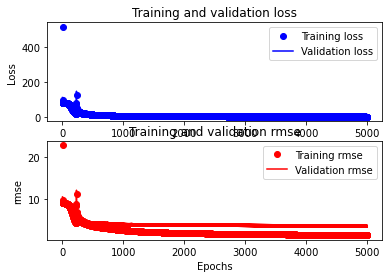

In [12]:

### history에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = result.history['loss']
val_loss = result.history['val_loss']
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 root_mean_squared_error val_root_mean_squared_error key를 가지는 값들만 추출
rmse = result.history['root_mean_squared_error']
val_rmse = result.history['val_root_mean_squared_error']
epochs = range(1, len(rmse) + 1)
### root_mean_squared_error val_root_mean_squared_error key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'ro', label='Training rmse')
plt.plot(epochs, val_rmse, 'r', label='Validation rmse')
plt.title('Training and validation rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

print("\n Test rmse: %.4f" % (model.evaluate(normed_test_data, Y_test)[1]))

plt.show()

In [13]:
## 10샘플 데이터를 넣어서 예측값을 출력하여 정답값과 비교
for i in range(10):
    input_test_data=np.expand_dims(normed_test_data.values[i][:], axis=0) # (5,) -> (1,5)
    print("true : ", Y_test.values[i], "prediction: ", model.predict(input_test_data))
plt.show()

## model 의 입력  -> ( batch size( 데이터 셋 개수), 입력데이터의 변수 갯수( 입력데이터의 차원 )) -> 2차원
## normed_test_data.values[i][:] -> i행의 모든 열의 값을 가져와 주세요. -> ( 5, ) -> 1차원
### model 입력 차원에 맞춰주기 위해 2차원으로 늘릴것이고, 늘리는 차원은 batch size 입니다.
## batch size는 데이터셋의 갯수 ! 즉, test 데이터셋 1개씩 들어갈거여서 1로 할당
## ( 5,) -> (1, 5)

true :  25.0 prediction:  [[22.682377]]
true :  24.6 prediction:  [[23.53592]]
true :  24.4 prediction:  [[21.389132]]
true :  20.4 prediction:  [[21.0608]]
true :  23.0 prediction:  [[22.519722]]
true :  28.1 prediction:  [[23.058292]]
true :  8.3 prediction:  [[9.971517]]
true :  22.0 prediction:  [[21.690306]]
true :  18.9 prediction:  [[21.108114]]
true :  24.3 prediction:  [[25.716366]]
